## <b> Customer Churn Analysis Project </b>
<b><em> By: Chirag Mathur </em></b>


- <b> Importing require library for performing EDA, Data Wrangling and data cleaning</b>

In [1]:
import pandas as pd # for data wrangling purpose
import numpy as np # Basic computation library
import seaborn as sns # For Visualization 
import matplotlib.pyplot as plt # ploting package
%matplotlib inline
import warnings # Filtering warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Customer Churn Analysis dataset Csv file using pandas

In [3]:
df=pd.read_csv(r'C:\Users\chinu\Downloads\Telecom_customer_churn.csv')

In [4]:
print('No. of Rows:', df.shape[0])
print('No. of Columns:', df.shape[1])
pd.set_option('display.max_columns',None) # # This will enable us to see truncated columns
df.head()

No. of Rows: 7043
No. of Columns: 21


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [5]:
# As we have 31 Columns Lets sort Columns by their datatype
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges'], object: ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']}

#### Comment :
- We have 7043 Rows and 21 Columns in this Telecom Dataset.
- <b> We have target Variable 'Churn' with object datatype, leading this to classification problem.</b>
- <b> There is interesting entry here under object datatype which is 'TotalCharges'. <u>This feature is numerical in nature but categories as Object datatypes.</u> This implies that there is presence of string variable in this column or might be data error.</b>
- 'SeniorCitizen' is categorical variable listed as Numerical variable. So we gone convert it into object datatype.
- At end we have 3 Numerical variable and 18 categorical variable. Out of which 'CustomerID' is unnecessary variable from our  analytical & modelling viewpoint.<b> We will drop 'CustomerID' column.</b>

   
#### We are going to Group Variable into Numerical and Categorical variables list in order to simplify further analysis. Next thing is droping CustomerID Column.

In [6]:
df.drop(['customerID'],axis=1,inplace=True)

df['SeniorCitizen']= df['SeniorCitizen'].astype(object)

In [7]:
# spliting into Numerical & Categorical 
Categorical = [ 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
            'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen', 'Churn']
Numerical = ['tenure','MonthlyCharges','TotalCharges']

# Statistical Analysis

<b> Before Going for Statistical exploration of data, first check integrity of data & Missing value </b>

### Data Integrity Check

<b> Since dataset is large, Let check for any entry which is repeated or duplicated in dataset. </b>

In [8]:
df.duplicated().sum()  # This will check the duplicate data for all columns.

np.int64(22)

<b> We can see that 22 duplicate entry in dataset. Let drop duplicated entry from dataset. </b>

In [9]:
df.drop_duplicates(keep='last',inplace= True)

In [10]:
df.shape

(7021, 20)

#### Now check for any whitespaces, NA,'-' in dataset. We might find something in TotalCharges column by considering Object datatype .

In [11]:
df.isin([' ','NA','-']).sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

<b> There is possibility of whitespaces in TotalCharges column. lets deal with it.</b>

In [12]:
df['TotalCharges'].isin([' ']).sum().any()

np.True_

In [13]:
# Replaceing Whitespaces with null values
df['TotalCharges']= df['TotalCharges'].replace(' ',np.nan)

In [14]:
# Converting object datatype into float
df['TotalCharges']= df['TotalCharges'].astype(float)

<b> We have remove whitespaces so let now check for missing values</b>

In [15]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                  Missing Values  % Missing data
TotalCharges                  11        0.156673
gender                         0        0.000000
Partner                        0        0.000000
SeniorCitizen                  0        0.000000
Dependents                     0        0.000000
tenure                         0        0.000000
MultipleLines                  0        0.000000
PhoneService                   0        0.000000
OnlineSecurity                 0        0.000000
OnlineBackup                   0        0.000000
DeviceProtection               0        0.000000
InternetService                0        0.000000
TechSupport                    0        0.000000
StreamingTV                    0        0.000000
Contract                       0        0.000000
StreamingMovies                0        0.000000
PaperlessBilling               0        0.000000
PaymentMethod                  0        0.000000
MonthlyCharges                 0        0.000000
Churn               

#### We can impute missing value in TotalCharges either with mean and median. We can decide imputation method after checking distribution and Outliers in data

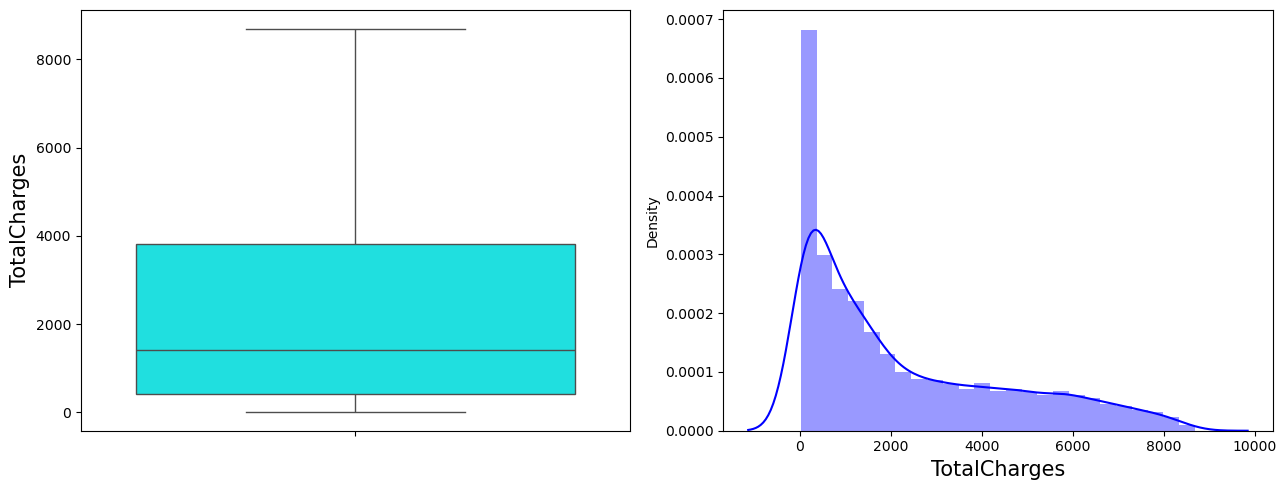

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(y='TotalCharges', data=df,color='cyan')
plt.ylabel('TotalCharges',fontsize=15)
plt.subplot(1,2,2)
sns.distplot(df['TotalCharges'], color='b')
plt.xlabel('TotalCharges',fontsize=15)
plt.tight_layout()
plt.show()

In [17]:
print("Mean of TotalCharges:",df['TotalCharges'].mean())
print("Median of TotalCharges:",df['TotalCharges'].median())

Mean of TotalCharges: 2290.3533880171185
Median of TotalCharges: 1403.875


#### Observation:
- We can see that Outliers doesnot exist, so no mean sensitivity issue present here.
- Distribution plot shows that Total Charges feature is right skewed.
- Mean is greater than Median.

<b> Considering above observation we can impute Missing value with Mean.</b>

#### Imputation of Missing value in TotalCharges with Mean

In [18]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())

#### Checking for Null values after Imputation

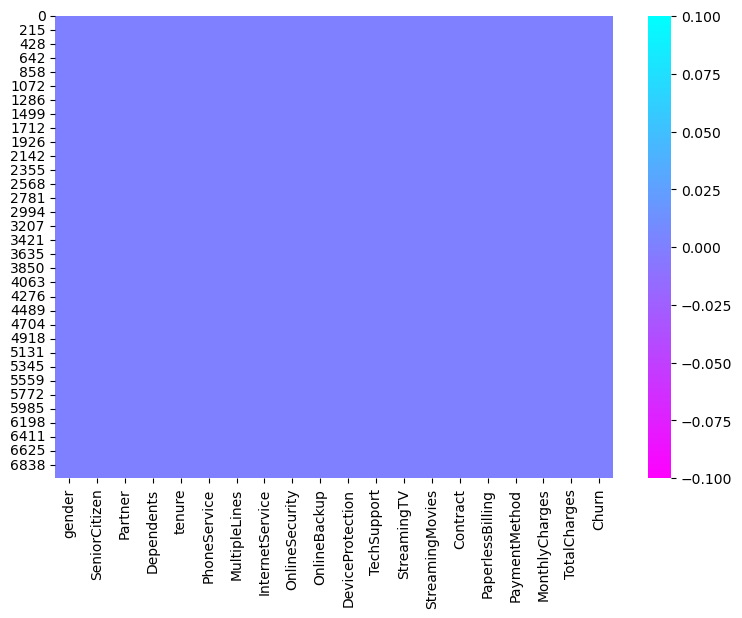

In [19]:
plt.figure(figsize=(9,6))
sns.heatmap(df.isnull(),cmap="cool_r")
plt.show()

#### Comment :
<b> Finally, No Missing Value is Present.

We are Now Yes To Go Further !!!</b>

### Statistical Matrix

In [20]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

In [21]:
df[Categorical].describe().T

count      mean       std  min  25%  50%  75%  max
SeniorCitizen  7021.0  0.162512  0.368947  0.0  0.0  0.0  0.0  1.0

#### The best way to avoid customer churn is to know your customers, and the best way to know your customer is through historical and new customer data.
#### Start with Enlisting Value counts & Sub-categories of different categorial features available

In [22]:
for i in Categorical:
    print(i)
    print(df[i].value_counts())
    print("="*100)

gender
gender
Male      3541
Female    3480
Name: count, dtype: int64
Partner
Partner
No     3619
Yes    3402
Name: count, dtype: int64
Dependents
Dependents
No     4911
Yes    2110
Name: count, dtype: int64
PhoneService
PhoneService
Yes    6339
No      682
Name: count, dtype: int64
MultipleLines
MultipleLines
No                  3368
Yes                 2971
No phone service     682
Name: count, dtype: int64
InternetService
InternetService
Fiber optic    3090
DSL            2419
No             1512
Name: count, dtype: int64
OnlineSecurity
OnlineSecurity
No                     3490
Yes                    2019
No internet service    1512
Name: count, dtype: int64
OnlineBackup
OnlineBackup
No                     3080
Yes                    2429
No internet service    1512
Name: count, dtype: int64
DeviceProtection
DeviceProtection
No                     3087
Yes                    2422
No internet service    1512
Name: count, dtype: int64
TechSupport
TechSupport
No                     34

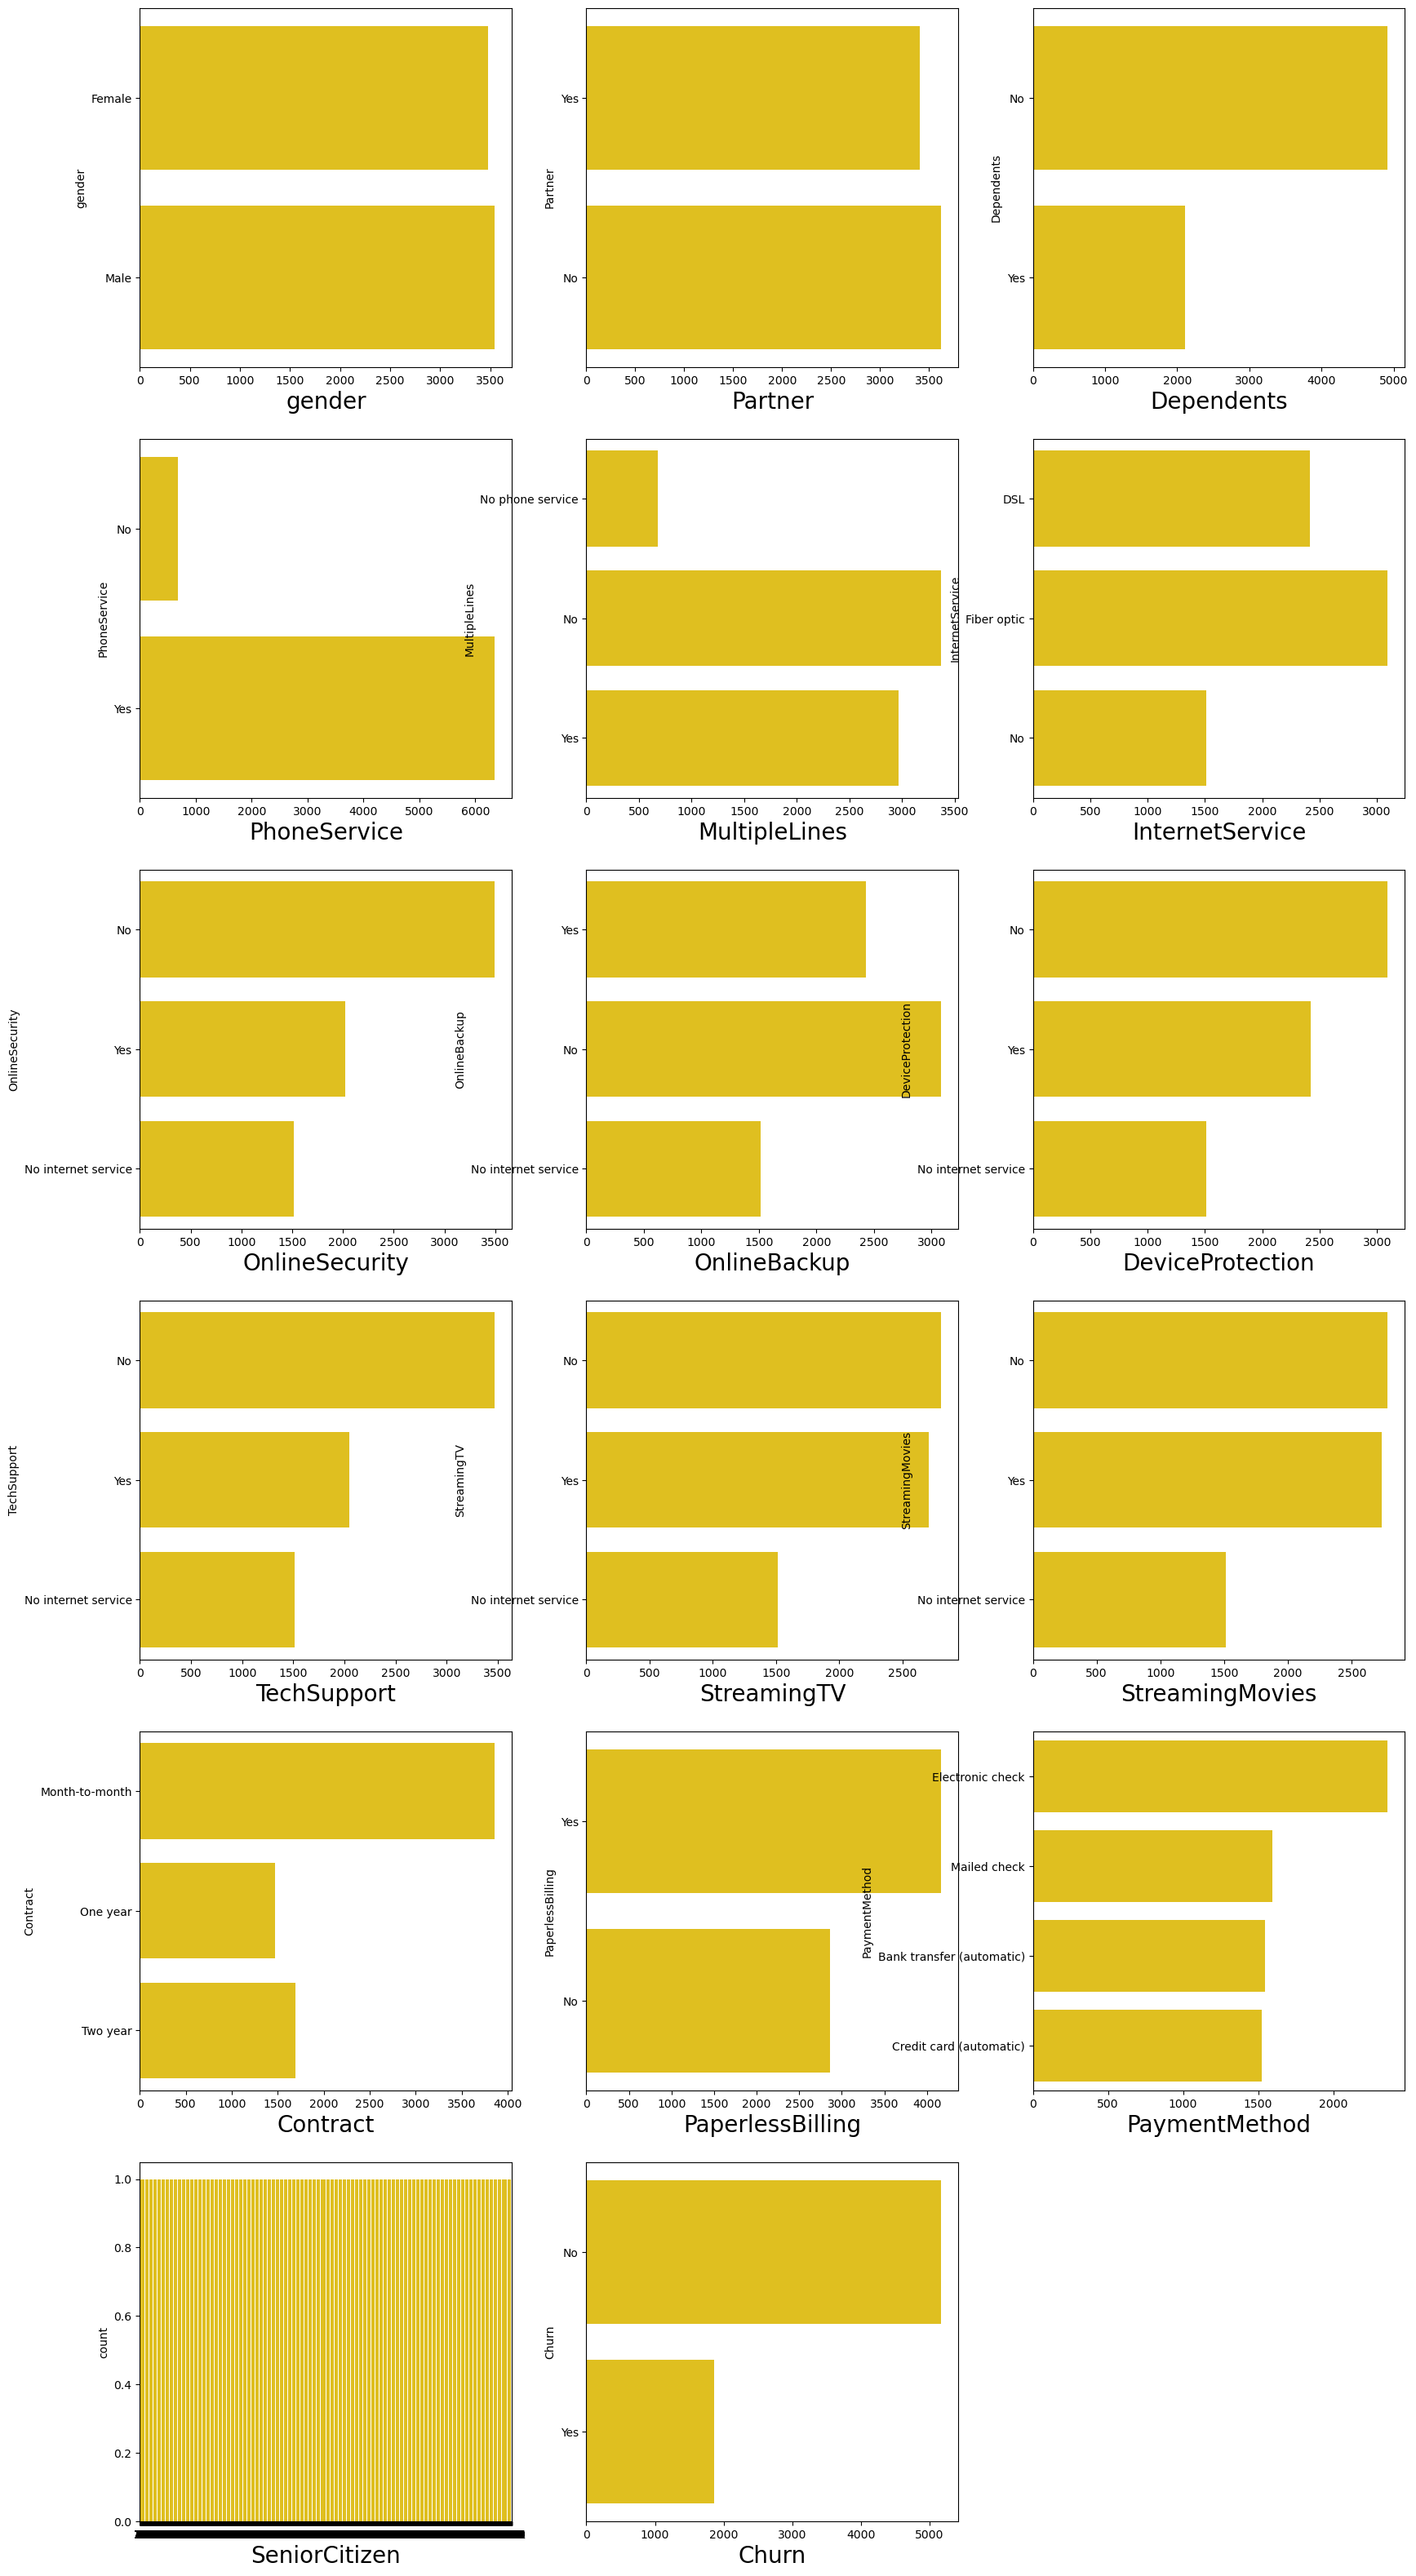

In [23]:
sns.set_palette('hsv')
plt.figure(figsize=(20,40), facecolor='white')
plotnumber =1
for i in Categorical:
    if plotnumber <=18:
        ax = plt.subplot(6,3,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=20)
    plotnumber+=1
plt.show()

<b> Now Start exploreing feature one by one, begin with Target Feature </b>

## Target Variable Churn

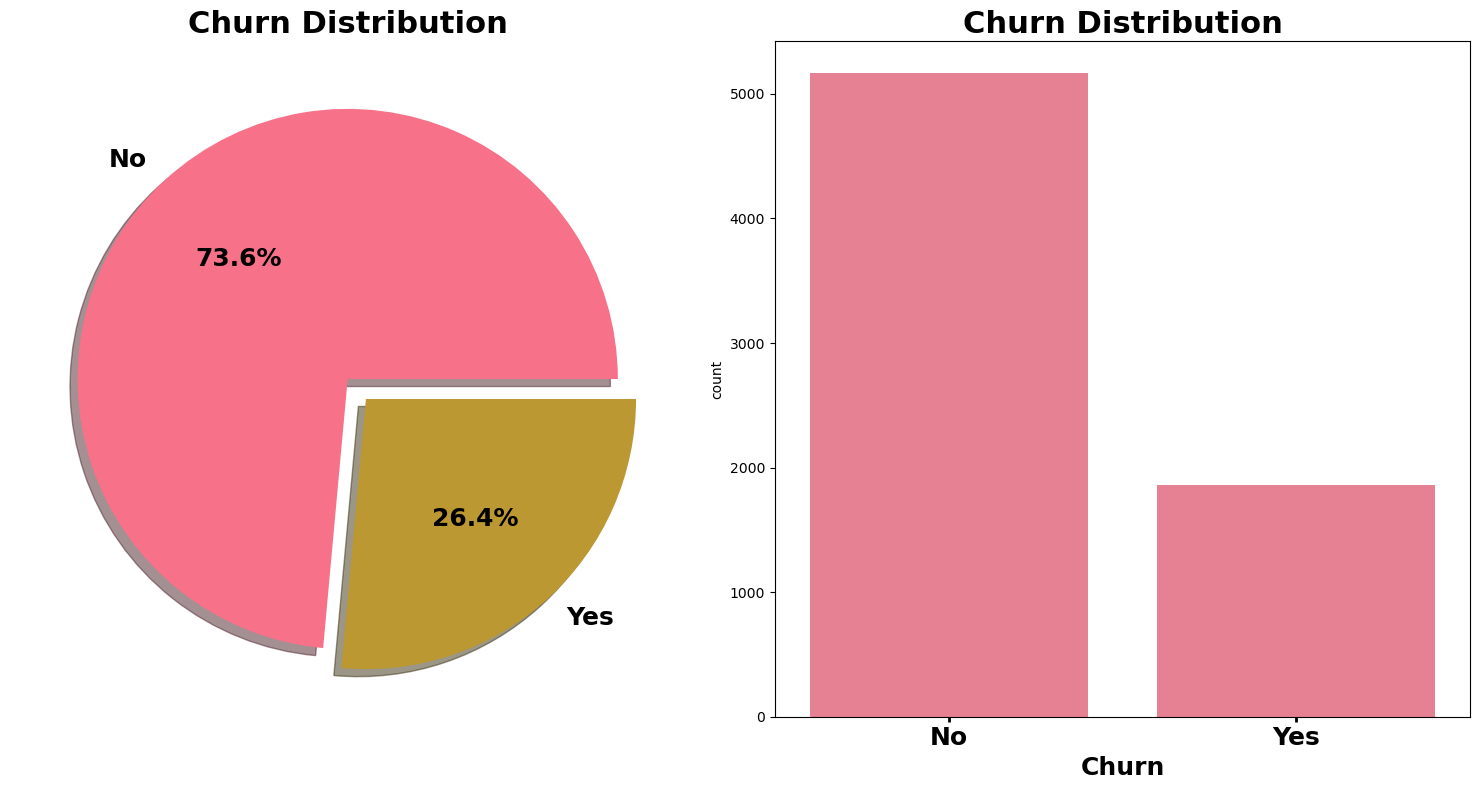

In [24]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(15, 8))

# Pie chart
df['Churn'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%3.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 18},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Churn Distribution', fontsize=22, fontweight='bold')
ax[0].set_ylabel('')

# Countplot
sns.countplot(x='Churn', data=df, ax=ax[1])
ax[1].set_title('Churn Distribution', fontsize=22, fontweight='bold')
ax[1].set_xlabel("Churn", fontsize=18, fontweight='bold')
ax[1].tick_params(axis='x', labelsize=18, labelrotation=0, width=2)
for label in ax[1].get_xticklabels():
    label.set_fontweight('bold')

plt.show()


#### Comment :
- 26.4 % Customer choose to churn service in last month. Which is quite high number.This all leads to imbalanced data case as churn is our target variable.

<b> Let start exploration of Independent feature to figure where customer are unstatisfied and what are customers need or inclination in cutting edge competition.</b> 

### Gender vs Churn : Can there exist any trend between gender & churn or any impact of gender on Churn?

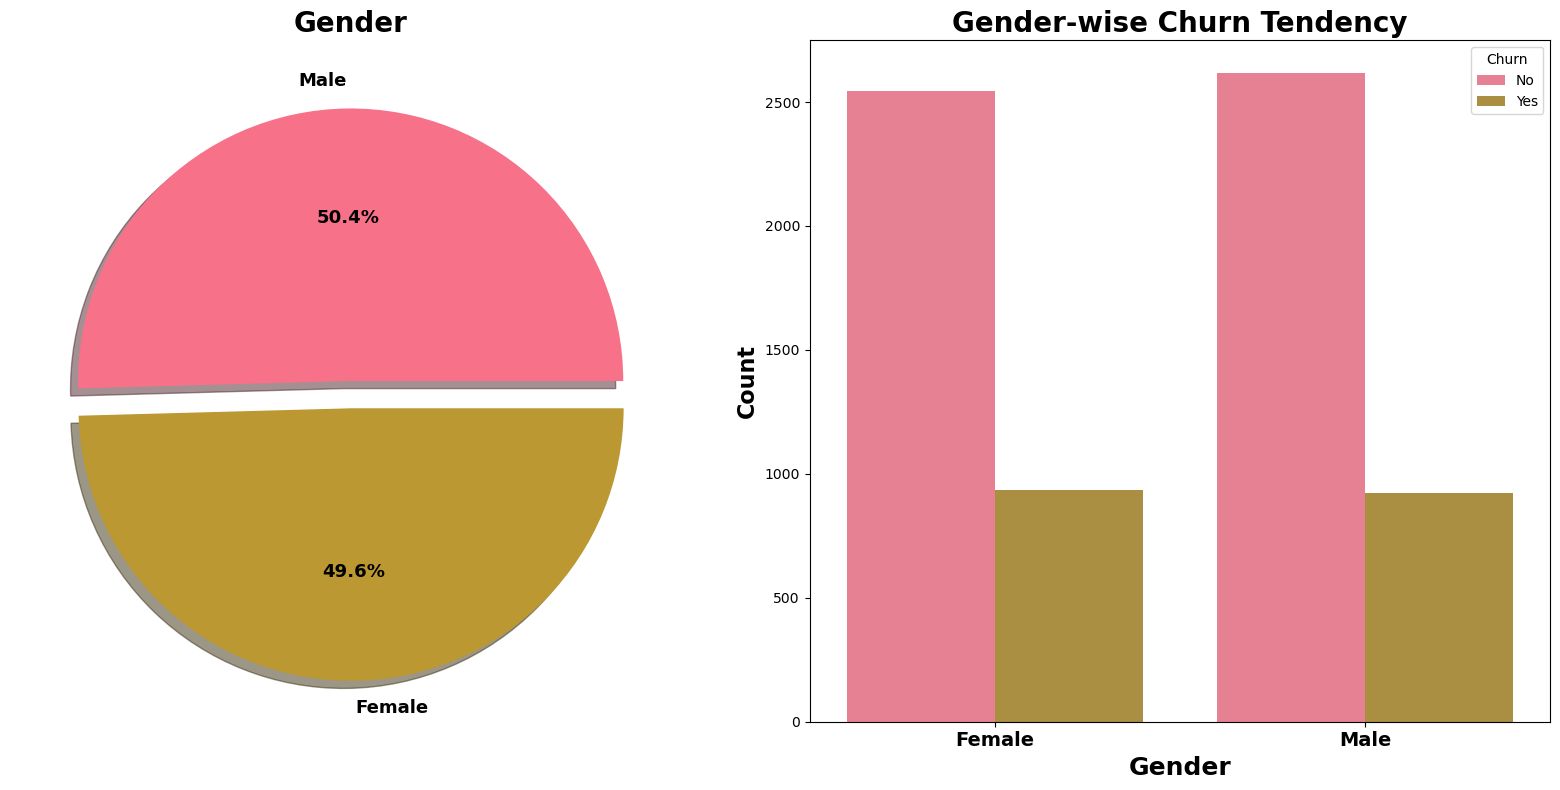

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

fig, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Gender distribution
df['gender'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Gender', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for Gender vs Churn
sns.countplot(x='gender', hue='Churn', data=df, ax=ax[1])
ax[1].set_title('Gender-wise Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Gender", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Format x-axis tick labels
ax[1].tick_params(axis='x', labelsize=14)
for label in ax[1].get_xticklabels():
    label.set_fontweight('bold')

plt.tight_layout()
plt.show()


In [26]:
pd.crosstab(df['gender'],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

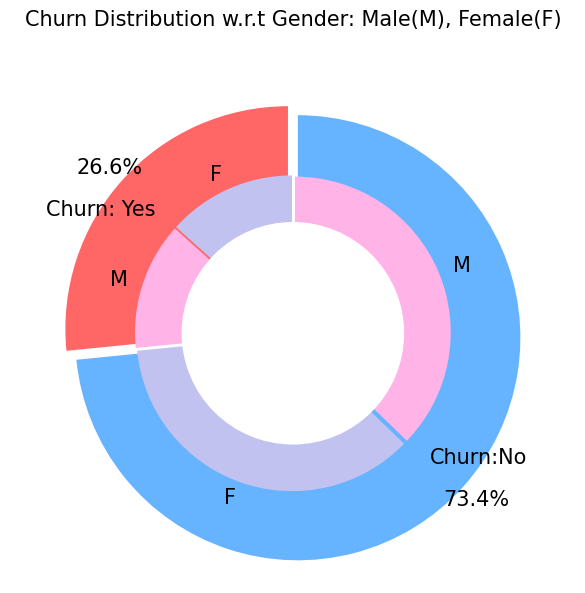

In [27]:
plt.figure(figsize=(6, 6))
labels =["Churn: Yes","Churn:No"]
values = [1869,5163]
labels_gender = ["F","M","F","M"]
sizes_gender = [939,930 , 2544,2619]
colors = ['#ff6666', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
explode = (0.3,0.3) 
explode_gender = (0.1,0.1,0.1,0.1)
textprops = {"fontsize":15}
#Plot
plt.pie(values, labels=labels,autopct='%1.1f%%',pctdistance=1.08, labeldistance=0.8,colors=colors, startangle=90,frame=True, explode=explode,radius=10, textprops =textprops, counterclock = True, )
plt.pie(sizes_gender,labels=labels_gender,colors=colors_gender,startangle=90, explode=explode_gender,radius=7, textprops =textprops, counterclock = True, )
#Draw circle
centre_circle = plt.Circle((0,0),5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Churn Distribution w.r.t Gender: Male(M), Female(F)', fontsize=15, y=1.1)

# show plot 
 
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Comment :
- Data contain both gender almost in same proportion with minor difference.
- Both gender have tendency of attrition in same percentage.

### Next Investigate Senior Citizen vs Gender Wise Churn Tendency

<b>Lets see how many of them are Senior Citizen and Churn tendency in senior citizen </b>

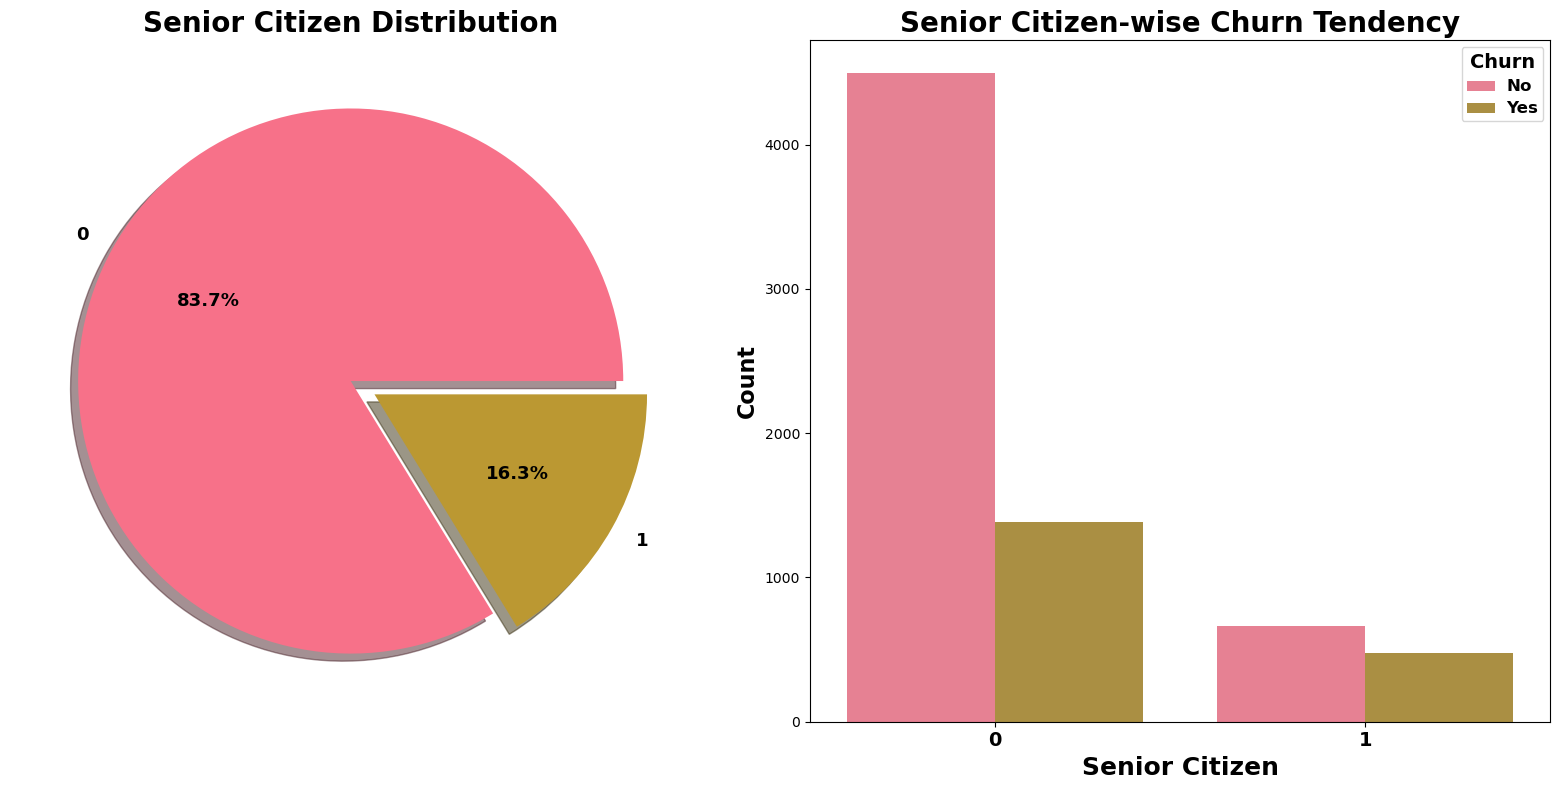

In [28]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart: Senior Citizen distribution
df['SeniorCitizen'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Senior Citizen Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot: Senior Citizen vs Churn
sns.countplot(x='SeniorCitizen', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Senior Citizen-wise Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Senior Citizen", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Format x-axis tick labels
ax[1].tick_params(axis='x', labelsize=14)
for label in ax[1].get_xticklabels():
    label.set_fontweight('bold')

# Format legend
leg = ax[1].legend(title="Churn")
plt.setp(leg.get_title(), fontsize=14, fontweight='bold')
for text in leg.get_texts():
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


 <b>There are only 16.3 % of the customers who are senior citizens. Thus most of our customers in the data are younger people.</b>

In [29]:
pd.crosstab([df.gender,df.SeniorCitizen],df["Churn"],margins=True).style.background_gradient(cmap='summer_r')

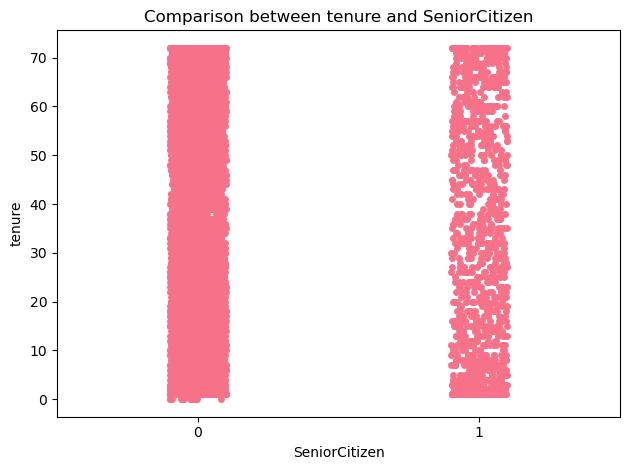

In [30]:
# Comparing tenure and SeniorCitizen
plt.title("Comparison between tenure and SeniorCitizen")
sns.stripplot(x = "SeniorCitizen",y="tenure",data = df)
plt.show()

**Around 16% customer are Senior citizen and form countplot we can see they have more tendency to churn.**

**There is no significant relation between Senior Citizen and Tenure.**

### Effect of Partner and Dependents on Churn

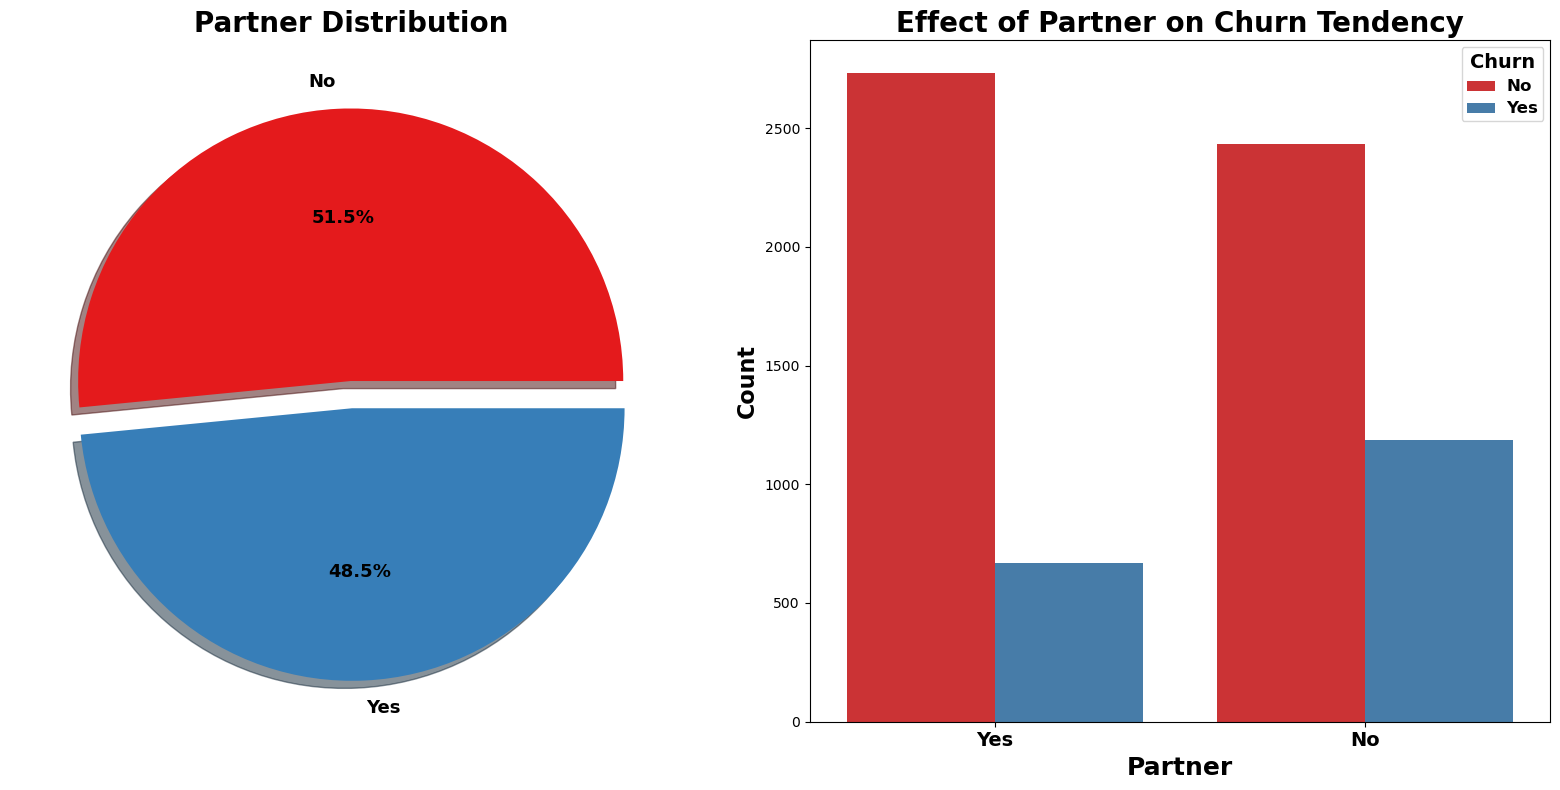

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set1')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart: Partner distribution
df['Partner'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Partner Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot: Partner vs Churn
sns.countplot(x='Partner', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Effect of Partner on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Partner", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Format x-axis ticks
ax[1].tick_params(axis='x', labelsize=14)
for label in ax[1].get_xticklabels():
    label.set_fontweight('bold')

# Format legend
leg = ax[1].legend(title="Churn")
plt.setp(leg.get_title(), fontsize=14, fontweight='bold')
for text in leg.get_texts():
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


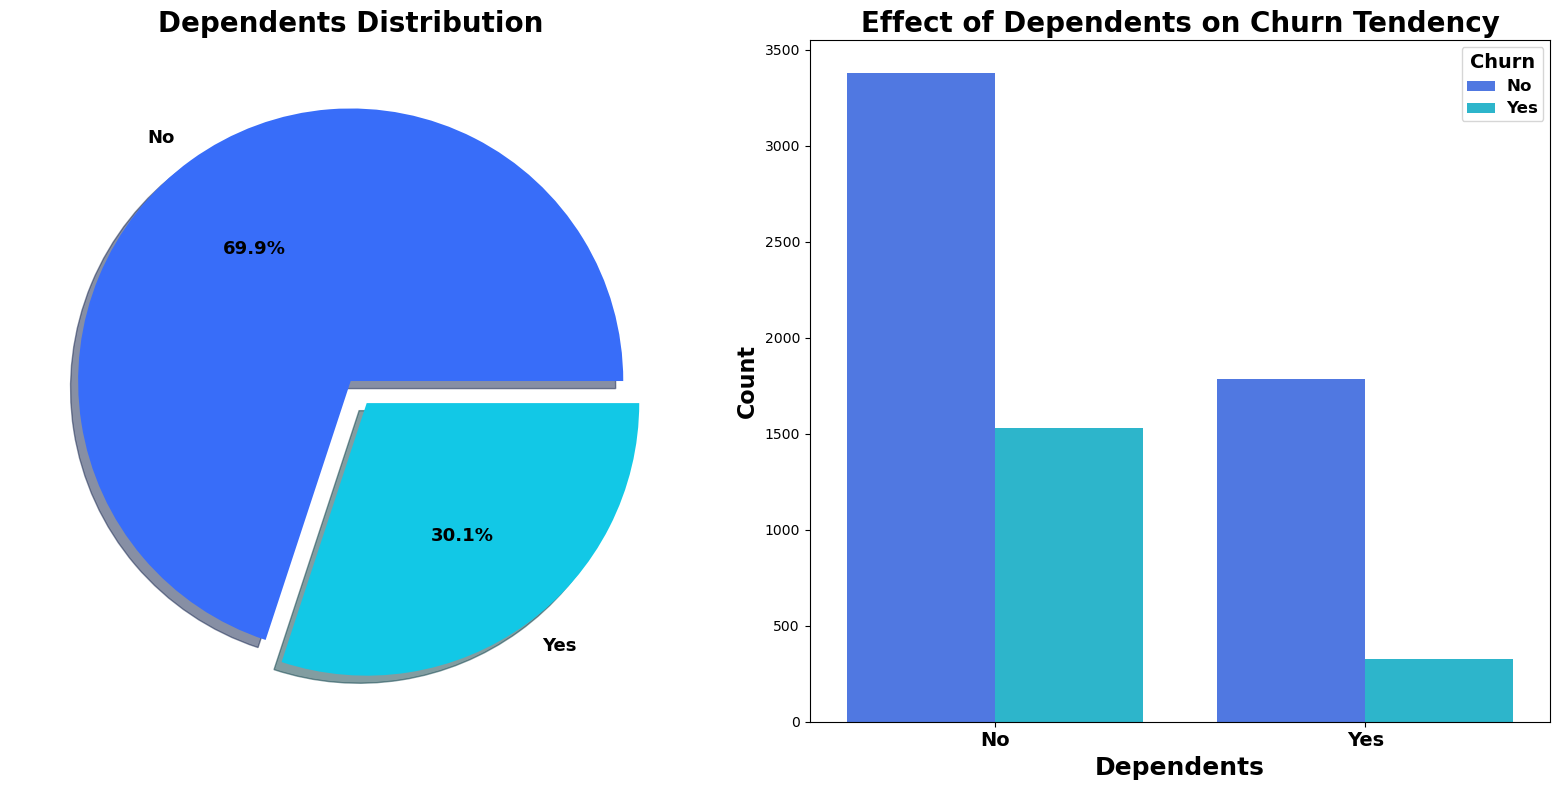

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart: Dependents distribution
df['Dependents'].value_counts().plot.pie(
    explode=[0, 0.1],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Dependents Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot: Dependents vs Churn
sns.countplot(x='Dependents', hue='Churn', data=df, ax=ax[1])
ax[1].set_title('Effect of Dependents on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Dependents", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Format x-axis ticks
ax[1].tick_params(axis='x', labelsize=14)
for label in ax[1].get_xticklabels():
    label.set_fontweight('bold')

# Format legend
leg = ax[1].legend(title="Churn")
plt.setp(leg.get_title(), fontsize=14, fontweight='bold')
for text in leg.get_texts():
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


#### Observation-
- **Customer having Partner have less tendency to Churn.**
- **Almost 30% Customer have dependents on them and they also have less tendency to churn compare to remaining 70%**

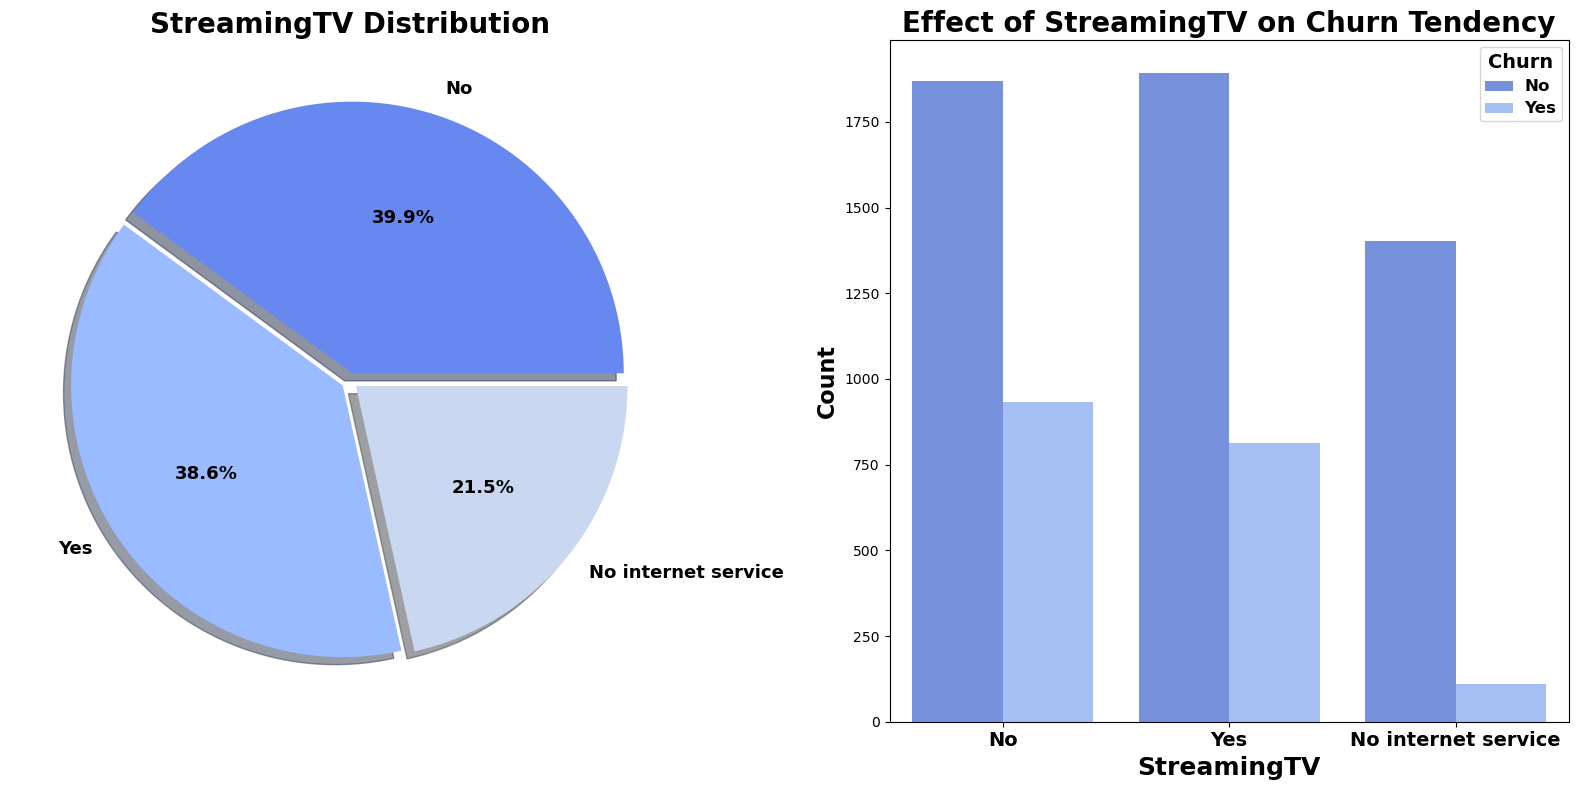

In [33]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart: StreamingTV distribution
df['StreamingTV'].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],  # works if there are 3 categories
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('StreamingTV Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot: StreamingTV vs Churn
sns.countplot(x='StreamingTV', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Effect of StreamingTV on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("StreamingTV", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Format x-axis tick labels
ax[1].tick_params(axis='x', labelsize=14)
for label in ax[1].get_xticklabels():
    label.set_fontweight('bold')

# Format legend
leg = ax[1].legend(title="Churn")
plt.setp(leg.get_title(), fontsize=14, fontweight='bold')
for text in leg.get_texts():
    text.set_fontsize(12)
    text.set_fontweight('bold')

plt.tight_layout()
plt.show()


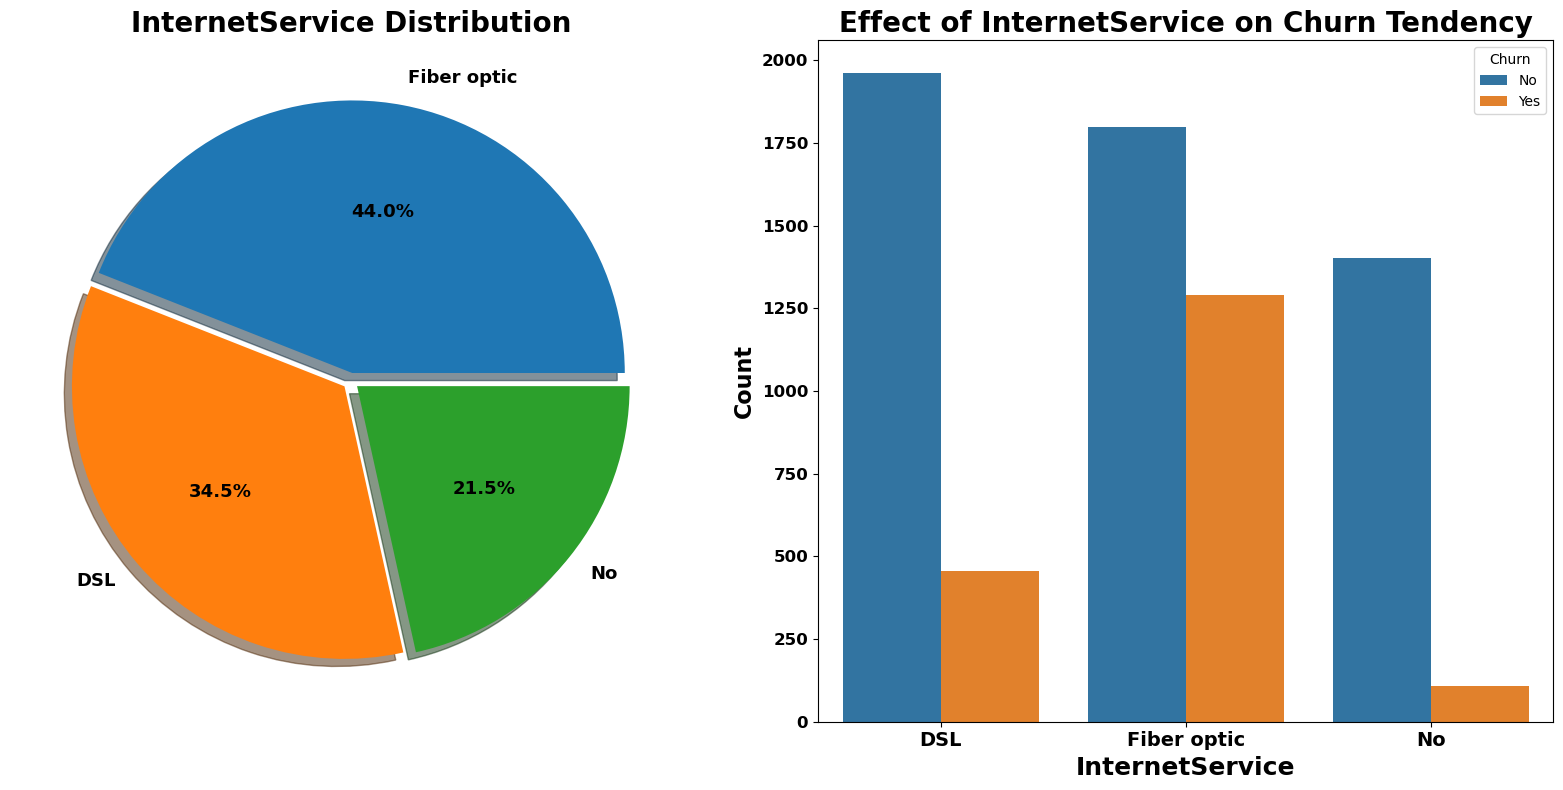

In [34]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('tab10')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

df['InternetService'].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('InternetService Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

sns.countplot(x='InternetService', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Effect of InternetService on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("InternetService", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Beautify x-ticks
plt.setp(ax[1].get_xticklabels(), fontsize=14, fontweight='bold')
plt.setp(ax[1].get_yticklabels(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


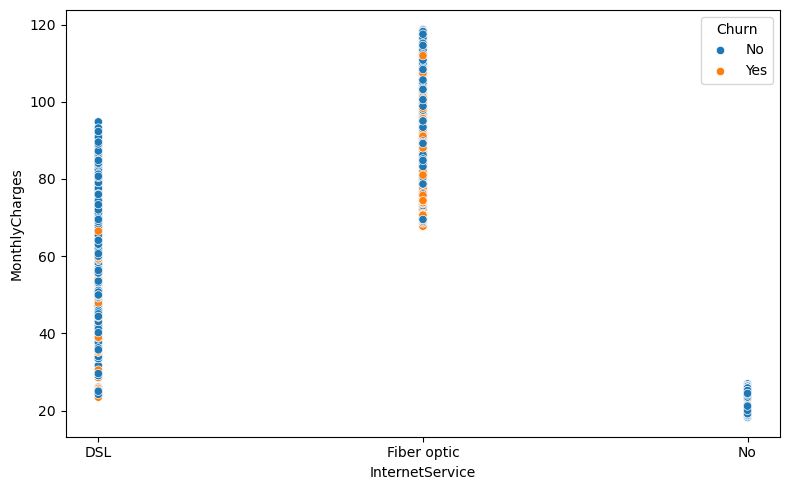

In [35]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="InternetService", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**44% Customer perfer Fibre optic as Interent service and surpringly we can find high churn rate among them.**

**We can find high monthly charges among customer using fiber optic compare to DSL. We can conclude that High charges is reason of customer churn.**

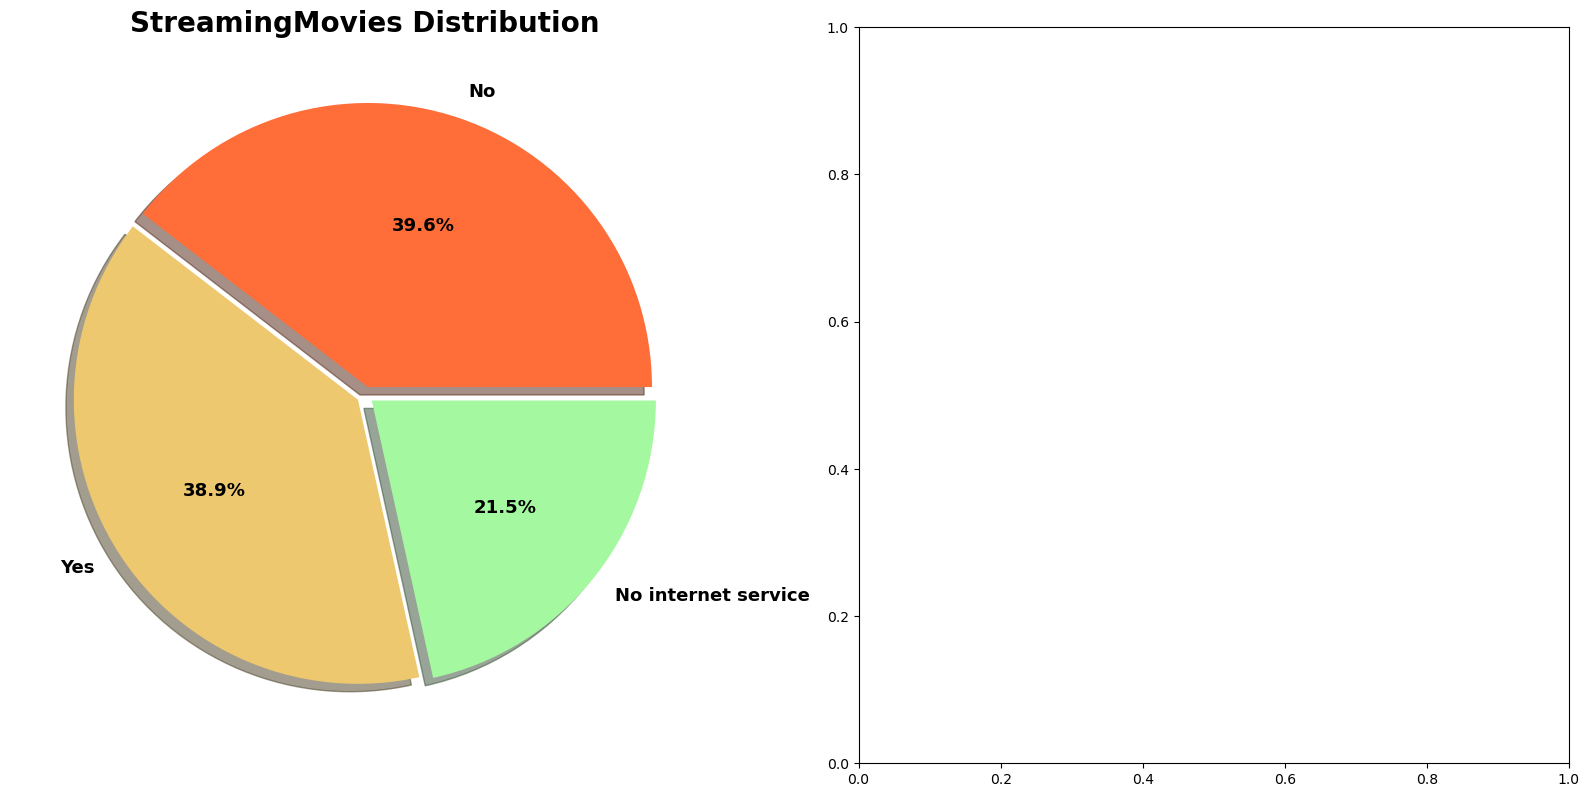

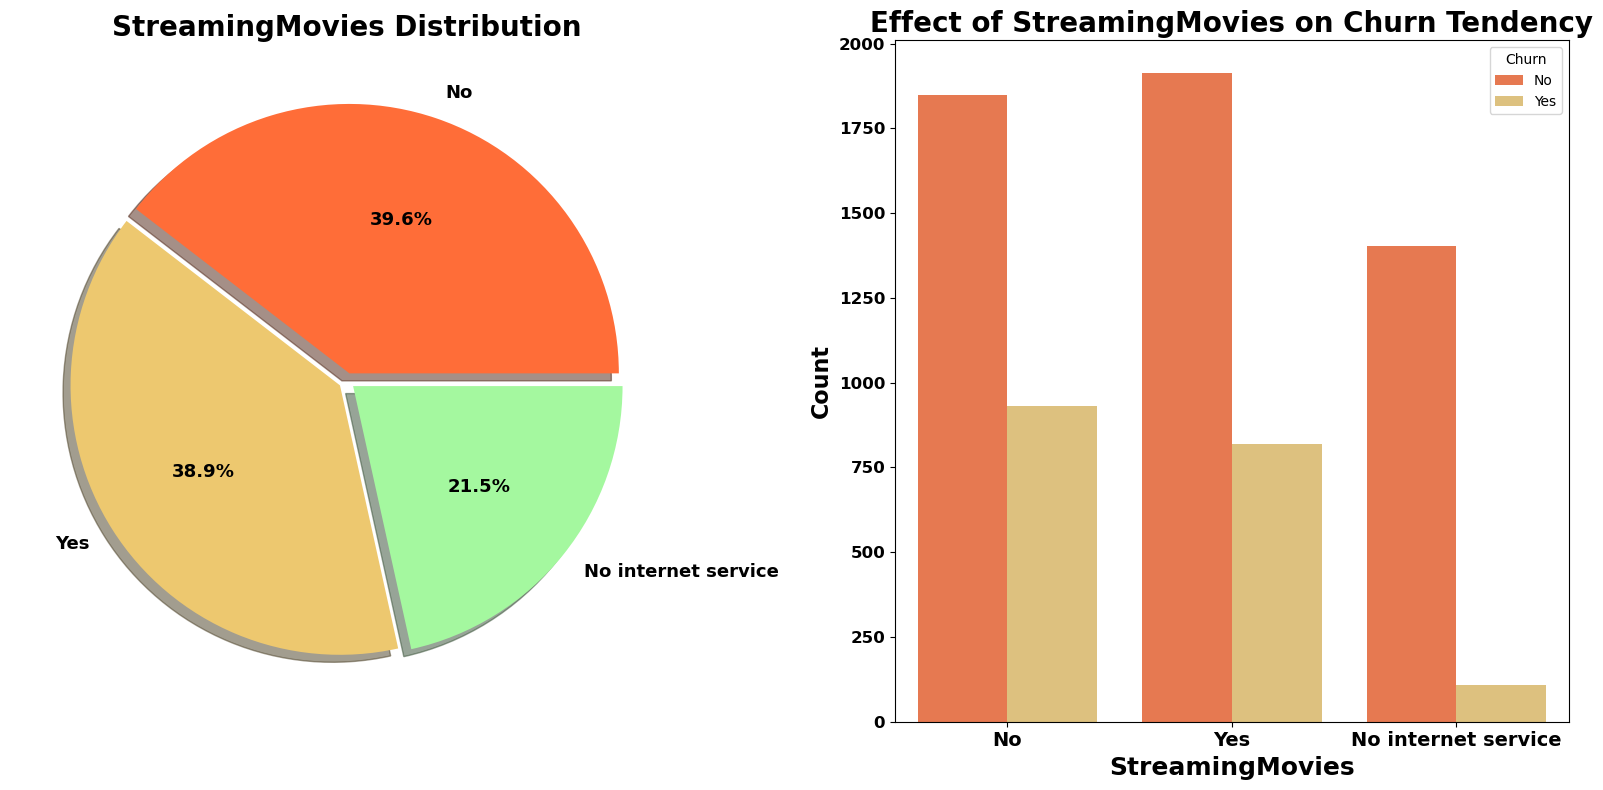

In [37]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('rainbow_r')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for StreamingMovies
df['StreamingMovies'].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('StreamingMovies Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for StreamingMovies vs Churn
sns.countplot(x='StreamingMovies', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Effect of StreamingMovies on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("StreamingMovies", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Beautify tick labels
plt.setp(ax[1].get_xticklabels(), fontsize=14, fontweight='bold')
plt.setp(ax[1].get_yticklabels(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**Almost same churn tendency in people streaming movies and not.**

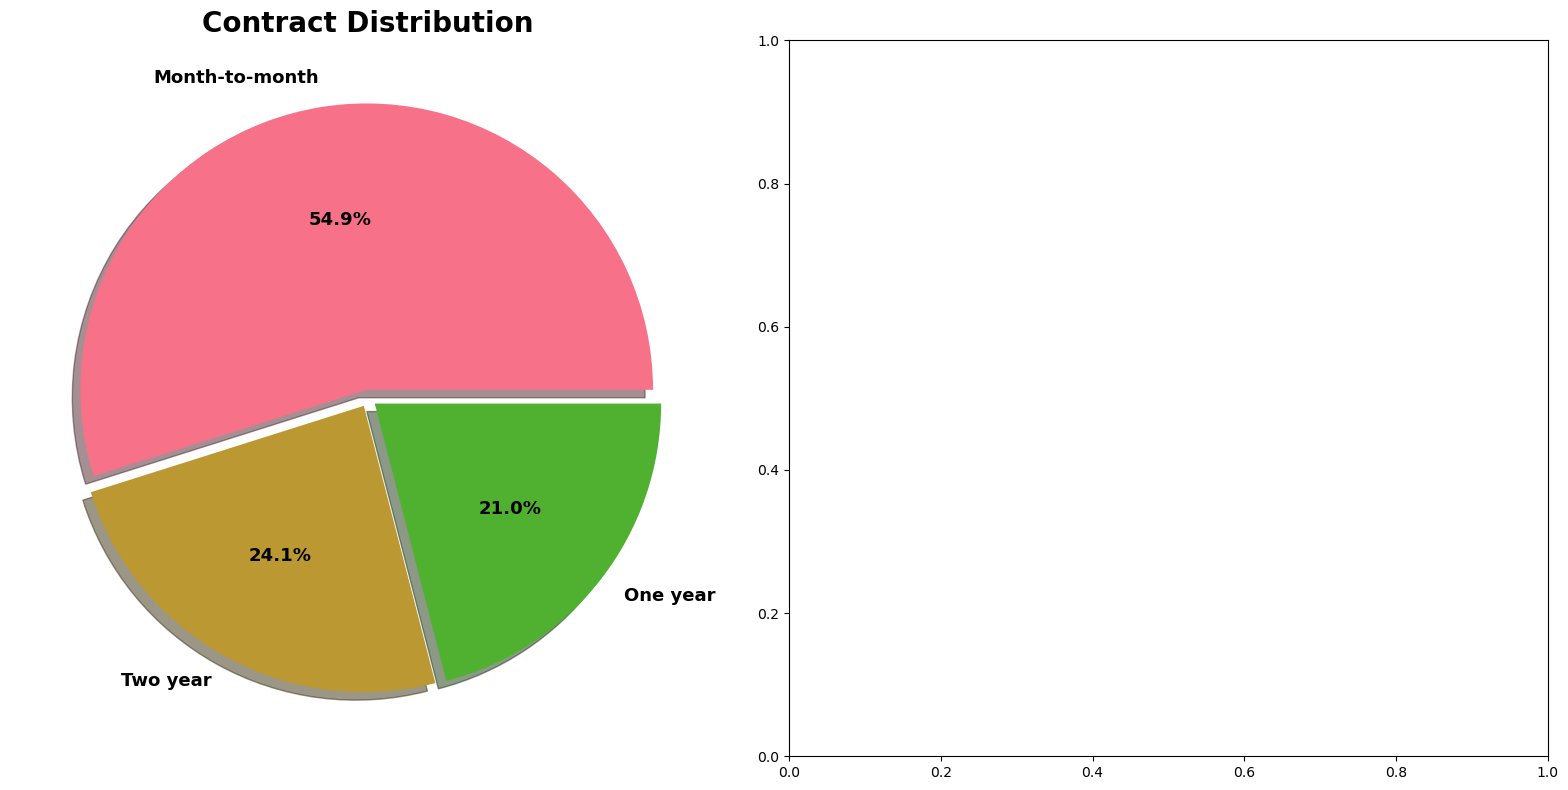

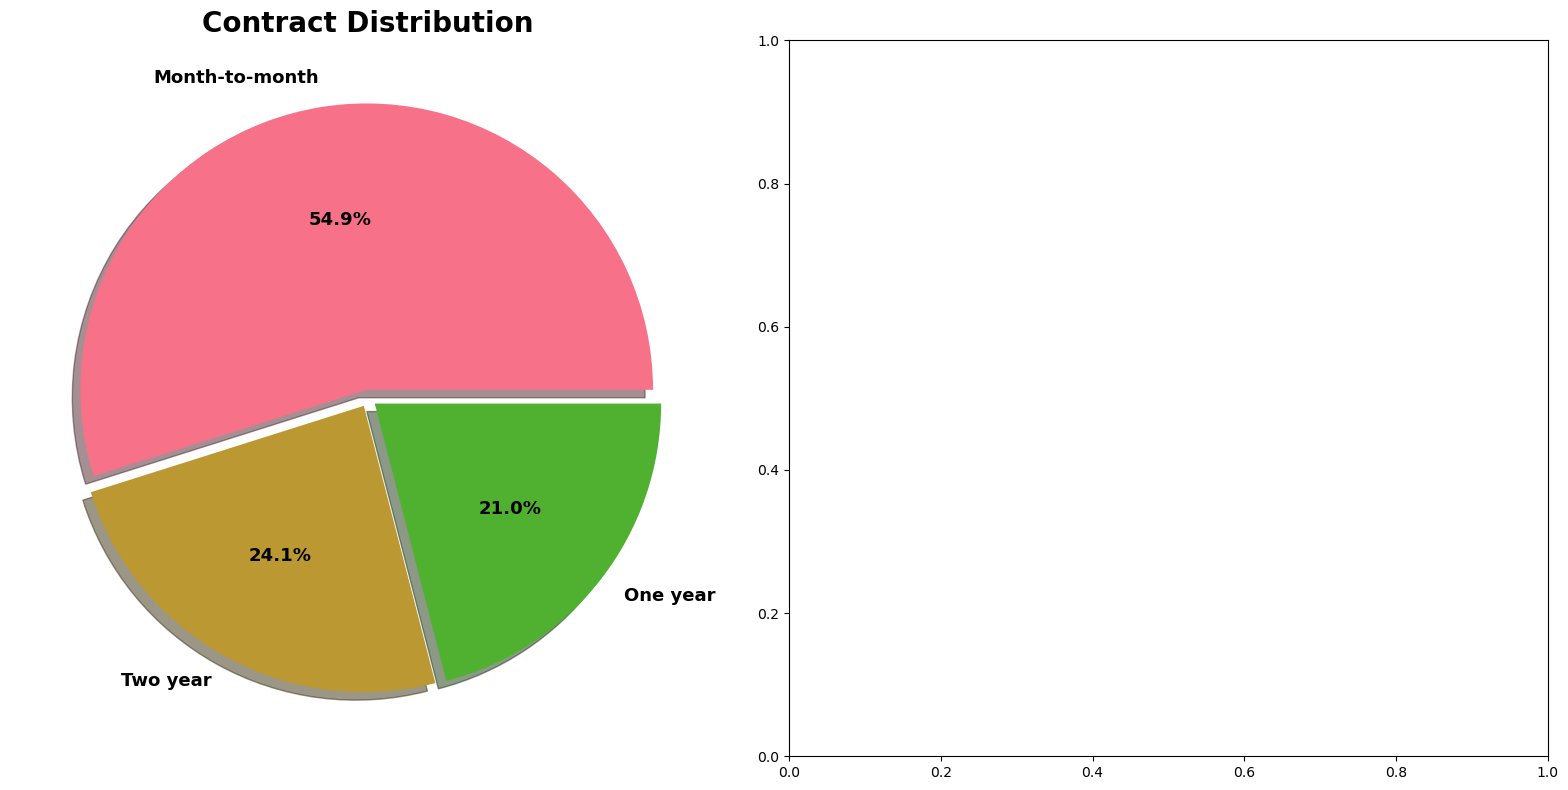

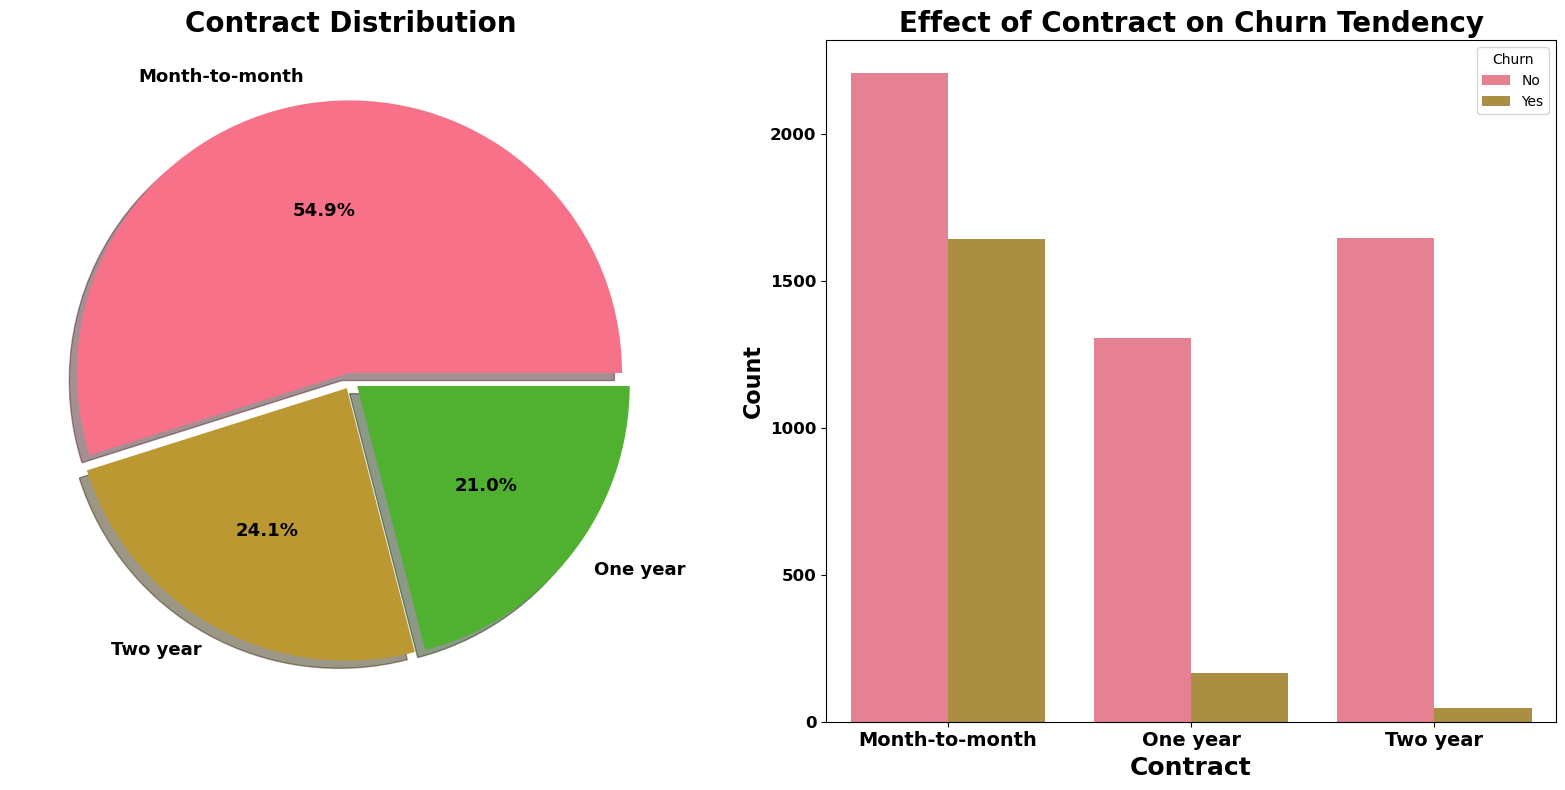

In [41]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Contract
df['Contract'].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Contract Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for Contract vs Churn
sns.countplot(x='Contract', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Effect of Contract on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Contract", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Beautify tick labels
plt.setp(ax[1].get_xticklabels(), fontsize=14, fontweight='bold')
plt.setp(ax[1].get_yticklabels(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


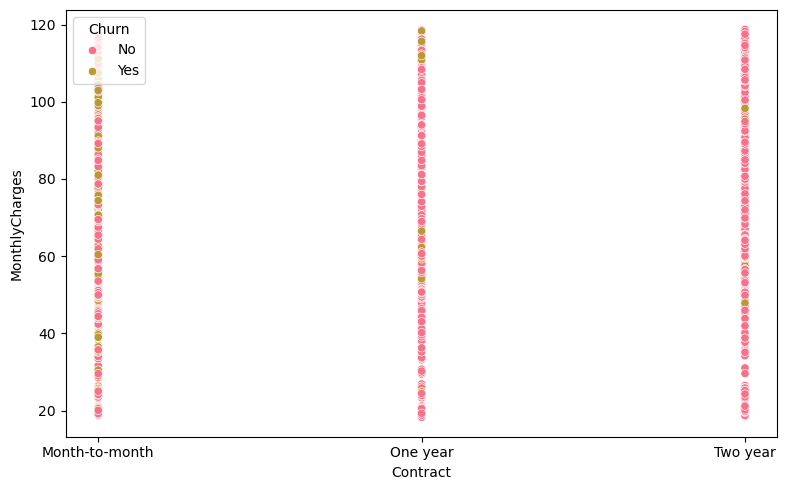

In [42]:
plt.figure(figsize=(8,5))
sns.scatterplot(x="Contract", y='MonthlyCharges',data=df,hue="Churn")
plt.show()

**Almost 55% customer perfer month to month contract compare to other.We also find high churn rate in these customer.**

**We did not find any relation between Monthly charges and contract tenure.**

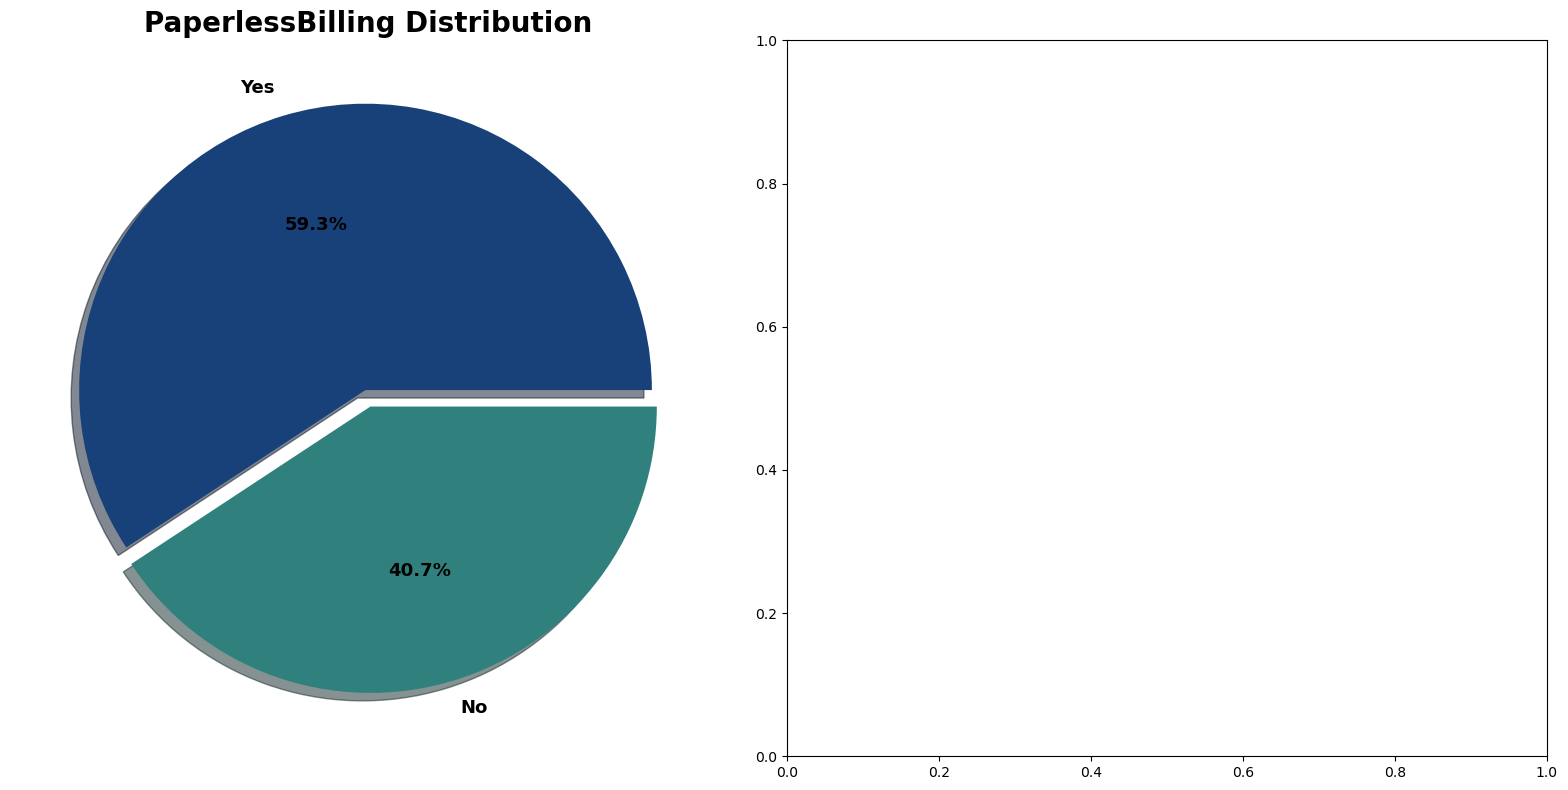

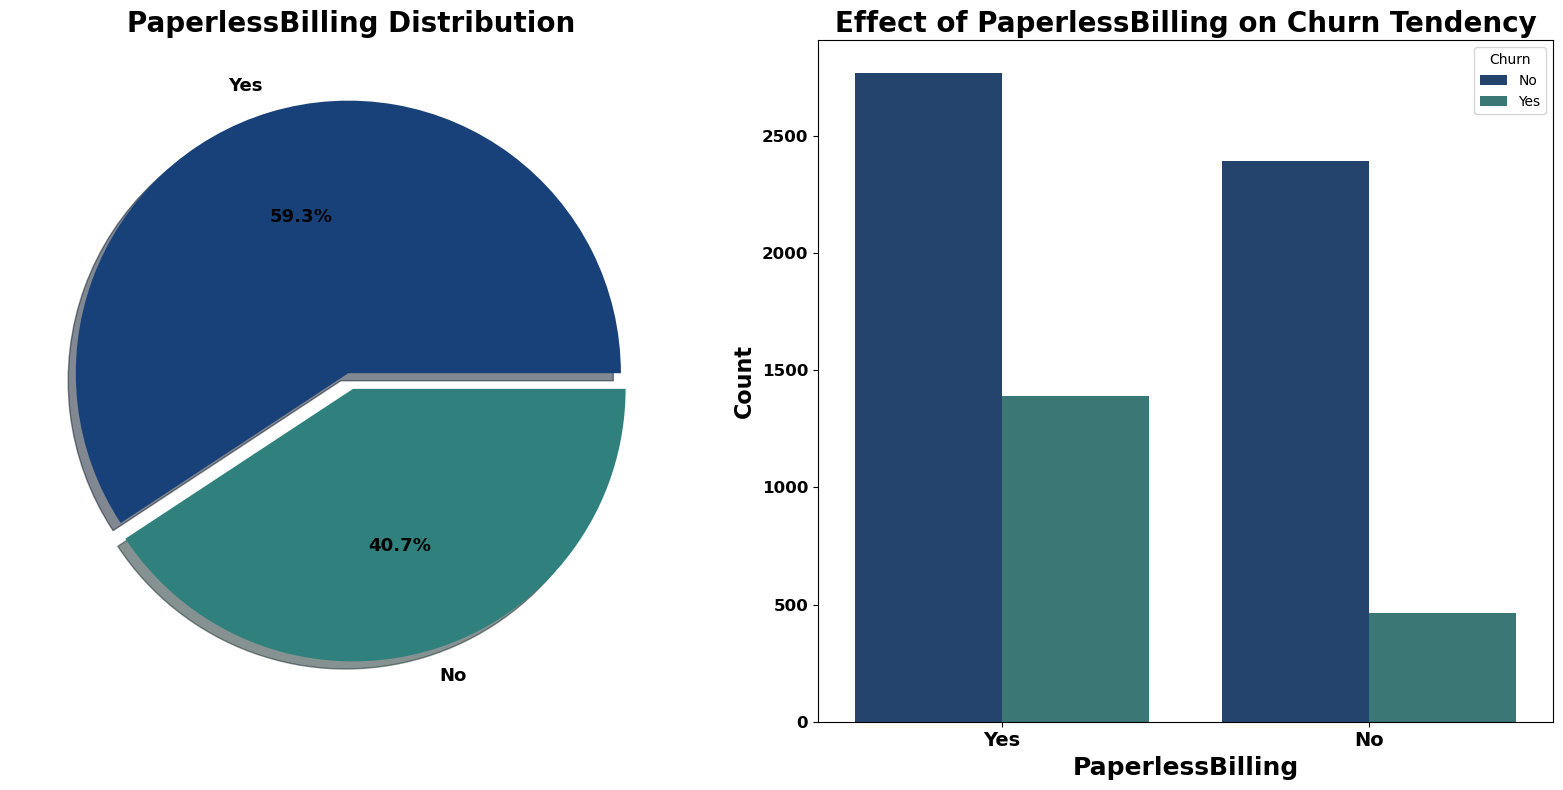

In [44]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('gist_earth')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for PaperlessBilling
df['PaperlessBilling'].value_counts().plot.pie(
    explode=[0.03, 0.03],
    autopct='%2.1f%%',
    textprops={'fontweight': 'bold', 'fontsize': 13},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('PaperlessBilling Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for PaperlessBilling vs Churn
sns.countplot(x='PaperlessBilling', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Effect of PaperlessBilling on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("PaperlessBilling", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Beautify tick labels
plt.setp(ax[1].get_xticklabels(), fontsize=14, fontweight='bold')
plt.setp(ax[1].get_yticklabels(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**60% Customer perfer paperless billing.**

**The customers who prefer paperless billing they have high churn rate.**

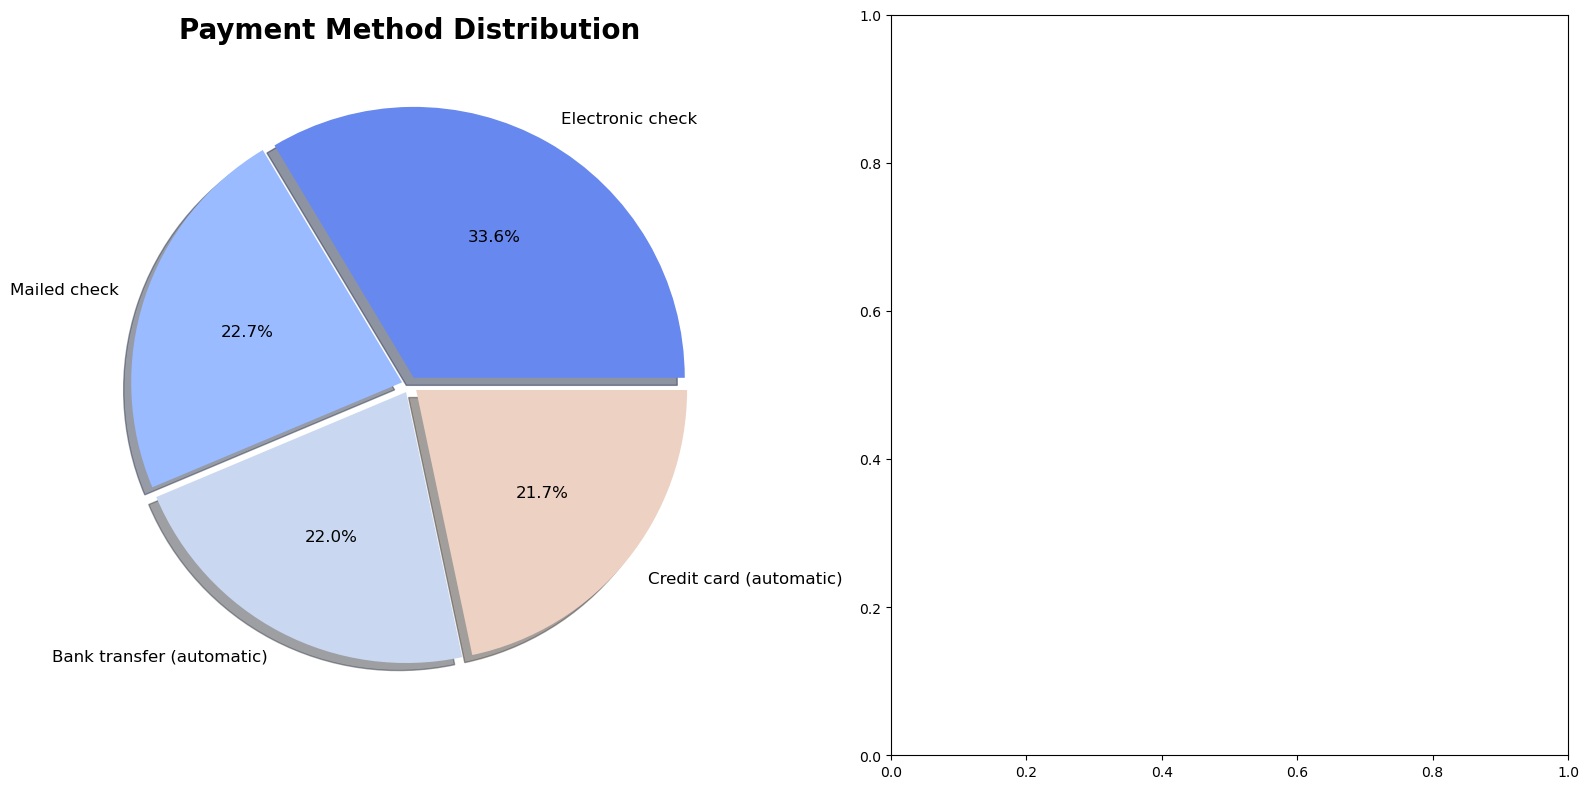

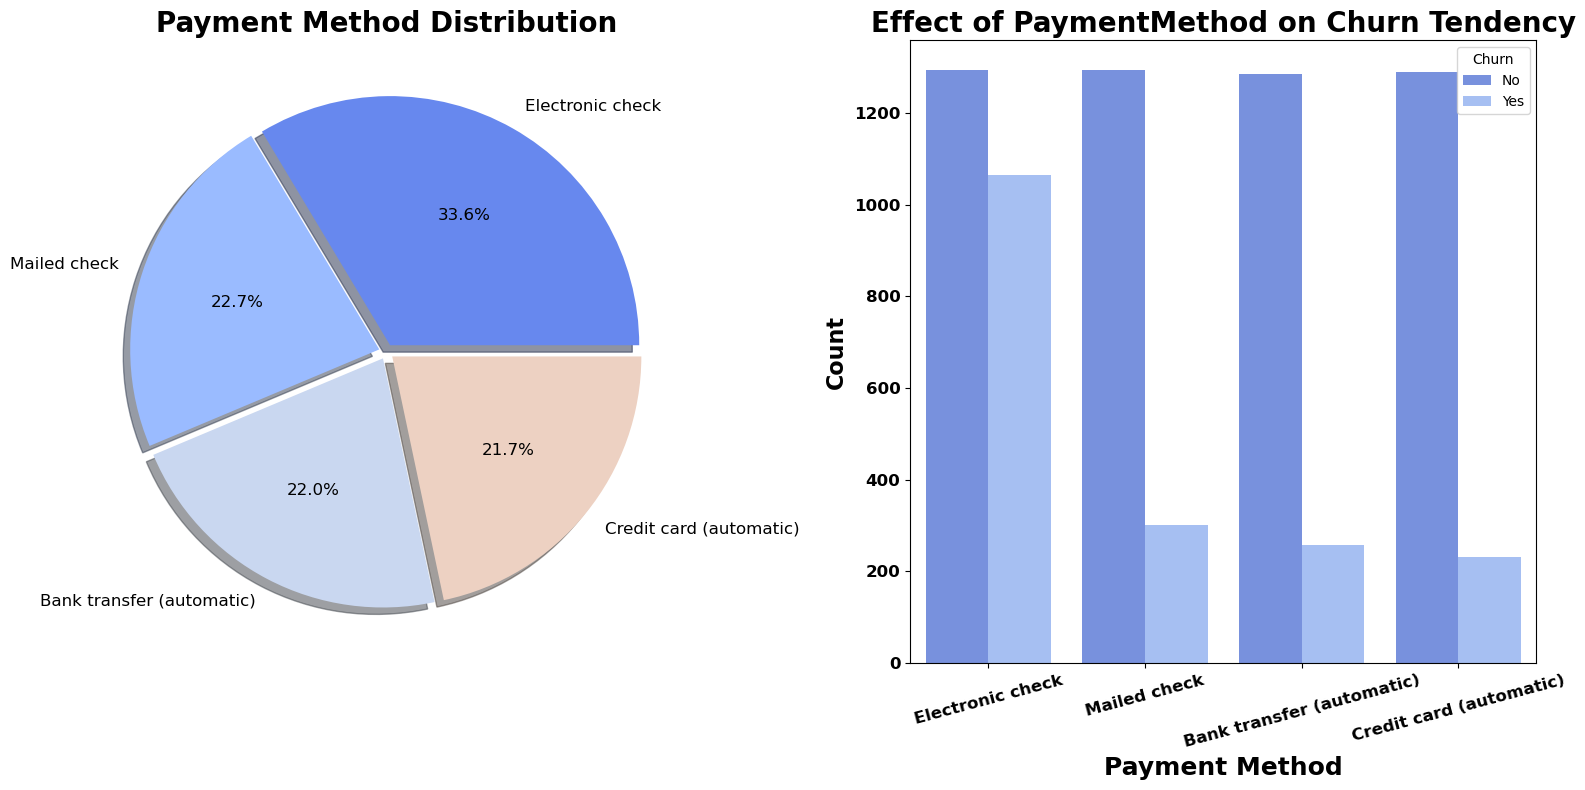

In [46]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('coolwarm')

f, ax = plt.subplots(1, 2, figsize=(16, 8))

# Pie chart for Payment Method
df['PaymentMethod'].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03, 0.03],
    autopct='%2.1f%%',
    textprops={'fontsize': 12},
    ax=ax[0],
    shadow=True
)
ax[0].set_title('Payment Method Distribution', fontsize=20, fontweight='bold')
ax[0].set_ylabel('')

# Countplot for PaymentMethod vs Churn
sns.countplot(x='PaymentMethod', hue="Churn", data=df, ax=ax[1])
ax[1].set_title('Effect of PaymentMethod on Churn Tendency', fontsize=20, fontweight='bold')
ax[1].set_xlabel("Payment Method", fontsize=18, fontweight='bold')
ax[1].set_ylabel("Count", fontsize=16, fontweight='bold')

# Beautify x-ticks
plt.setp(ax[1].get_xticklabels(), fontsize=12, fontweight='bold', rotation=15)
plt.setp(ax[1].get_yticklabels(), fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()


**We can see high Attrition tendency in customer who pay by Electronic check.**

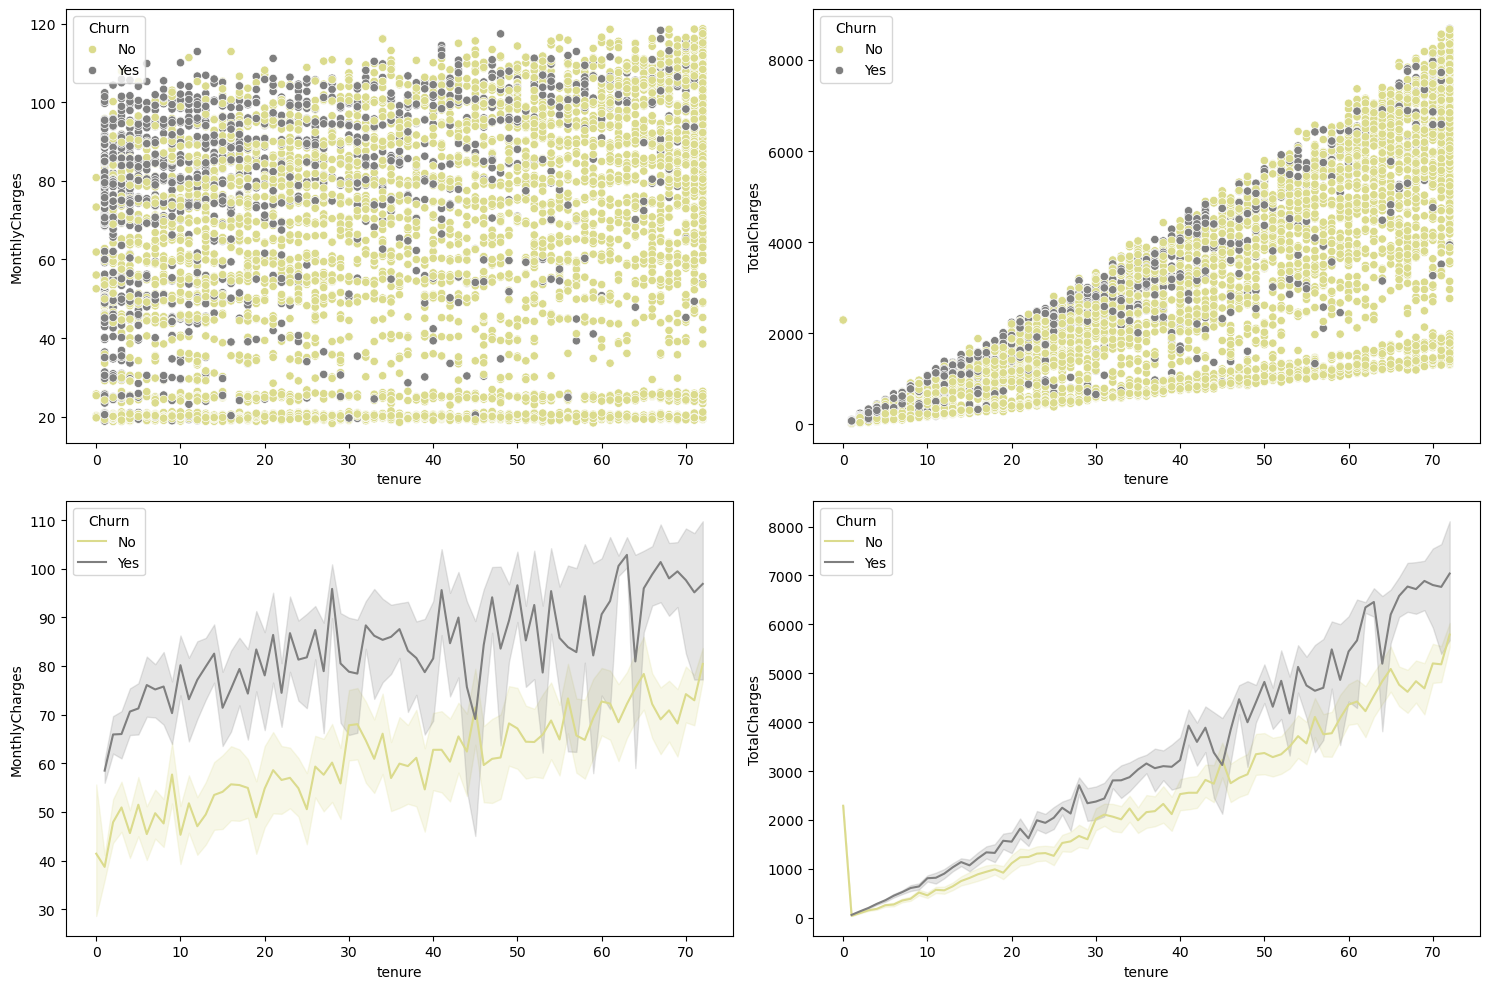

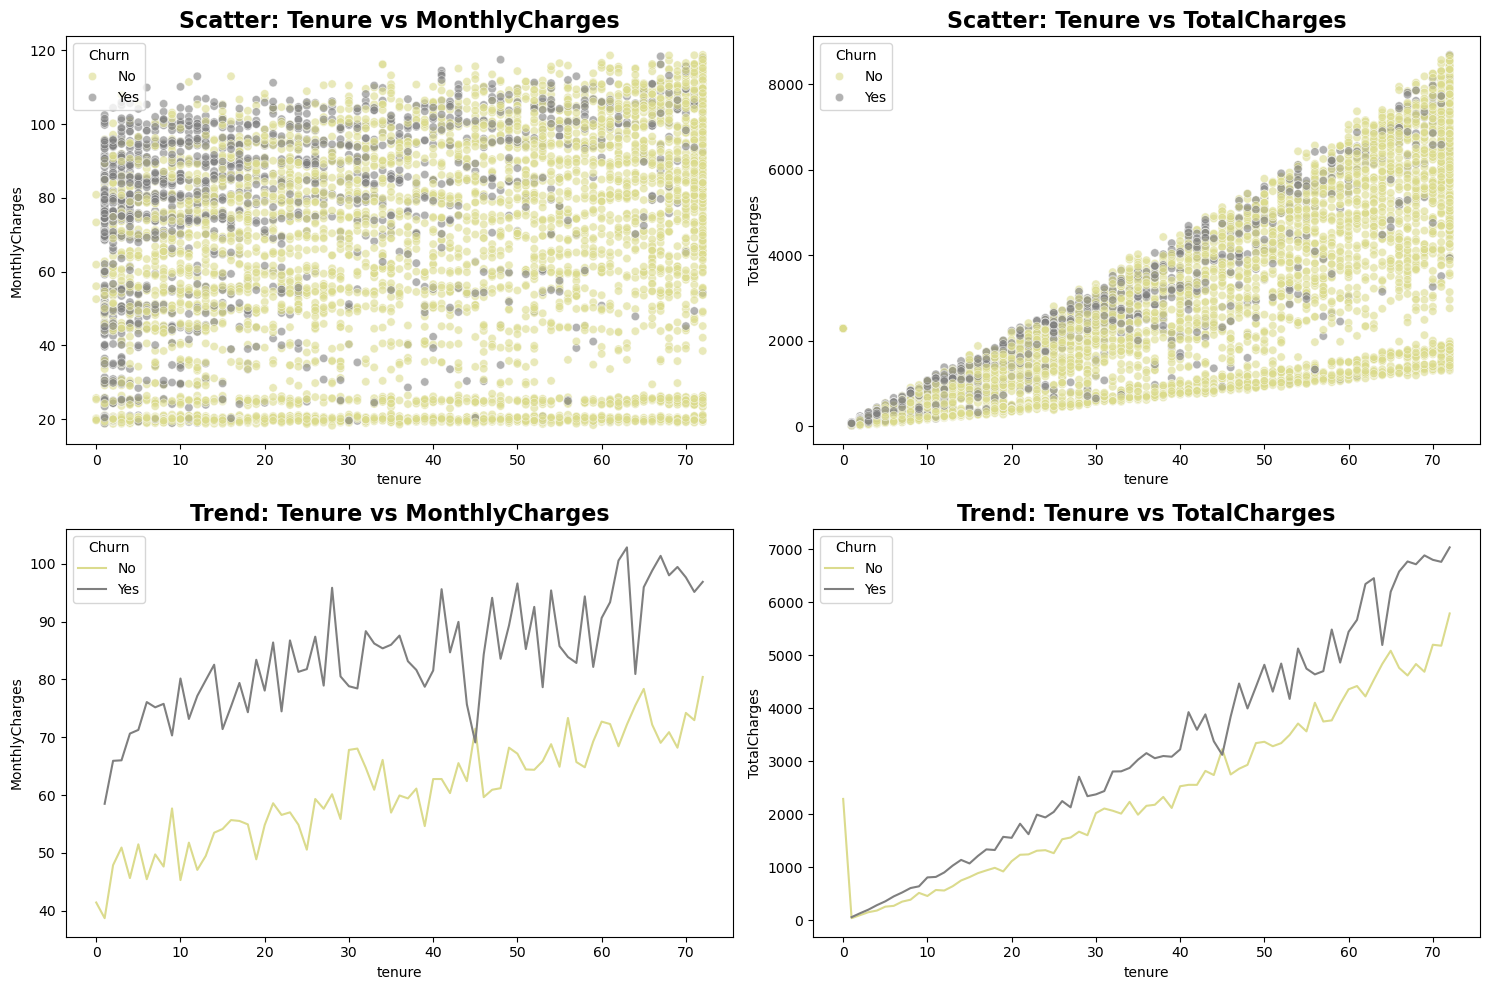

In [48]:
sns.set_palette('tab20_r')
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Flatten axes for easy indexing
axes = ax.flatten()

for i, col in enumerate(["MonthlyCharges", "TotalCharges"]):
    # Scatter plot
    sns.scatterplot(
        ax=axes[i],
        x="tenure",
        y=col,
        data=df,
        hue="Churn",
        alpha=0.6
    )
    axes[i].set_title(f"Scatter: Tenure vs {col}", fontsize=16, fontweight='bold')

    # Line plot (trend line)
    sns.lineplot(
        ax=axes[i+2],
        x="tenure",
        y=col,
        data=df,
        hue="Churn",
        ci=None
    )
    axes[i+2].set_title(f"Trend: Tenure vs {col}", fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()


#### Observation:
- **High Monthly Charges in customer who choose churn compare to rest.**
- **Same goes with High Total Charges in customer who choose churn compare to rest.**

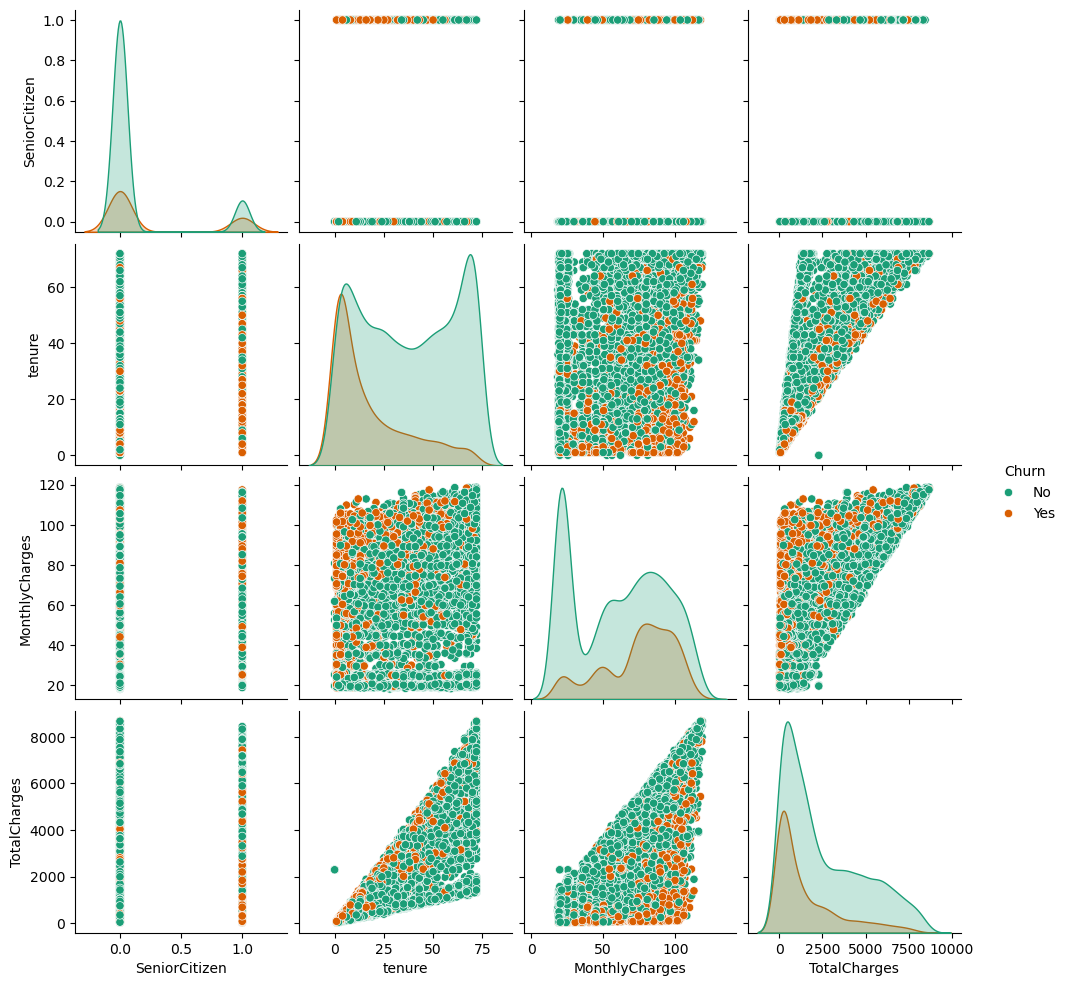

In [49]:
sns.pairplot(df,hue="Churn",palette="Dark2")
plt.show()

# Encoding categorical data

In [50]:
df.columns.to_series().groupby(df.dtypes).groups


{int64: ['SeniorCitizen', 'tenure'], float64: ['MonthlyCharges', 'TotalCharges'], object: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']}

In [51]:
df.head()

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [52]:
Numerical =['tenure','MonthlyCharges', 'TotalCharges']

In [53]:
Category =['gender', 'Partner','PhoneService', 'Dependents', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies', 
           'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [54]:
# Using Label Encoder on categorical variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               0             2   
1              0                0               2             0   
2              0                0               2             2   
3              1                0               2             0   
4              0                1               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 0            0            0                0         0   
1                 2            0            0                0         1   
2                 0            0            0                0         0   
3                 2            2            0                0         1   
4                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 1              2           29.85         29.85      0  
1                 0              3           56.95       1889.50      0  
2                 1              3           53.85        108.15      1  
3                 0              0           42.30       1840.75      0  
4                 1              2           70.70        151.65      1

# Feature selection and Engineering

## 1. Outliers Detection and Removal

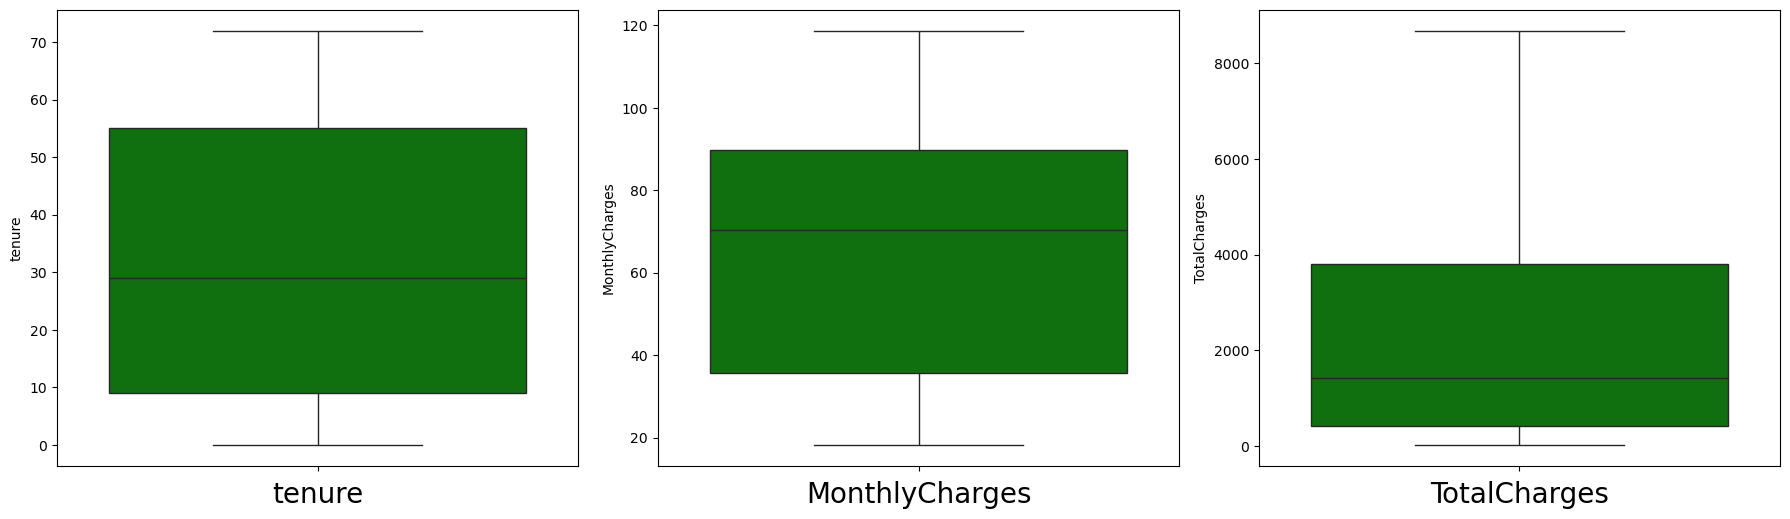

In [55]:
plt.figure(figsize=(18,10),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=6:
        ax=plt.subplot(2,3,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

<b> From Boxplot we can see No outliers exist dataset.</b>

### Outliers removal using Zscore method

In [56]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7021, 20)
Shape of the dataframe after removing outliers:  (6339, 20)
Percentage of data loss post outlier removal:  9.713715994872524


In [57]:
df.drop(['PhoneService'],axis=1,inplace=True)

## 2. Skewness of features

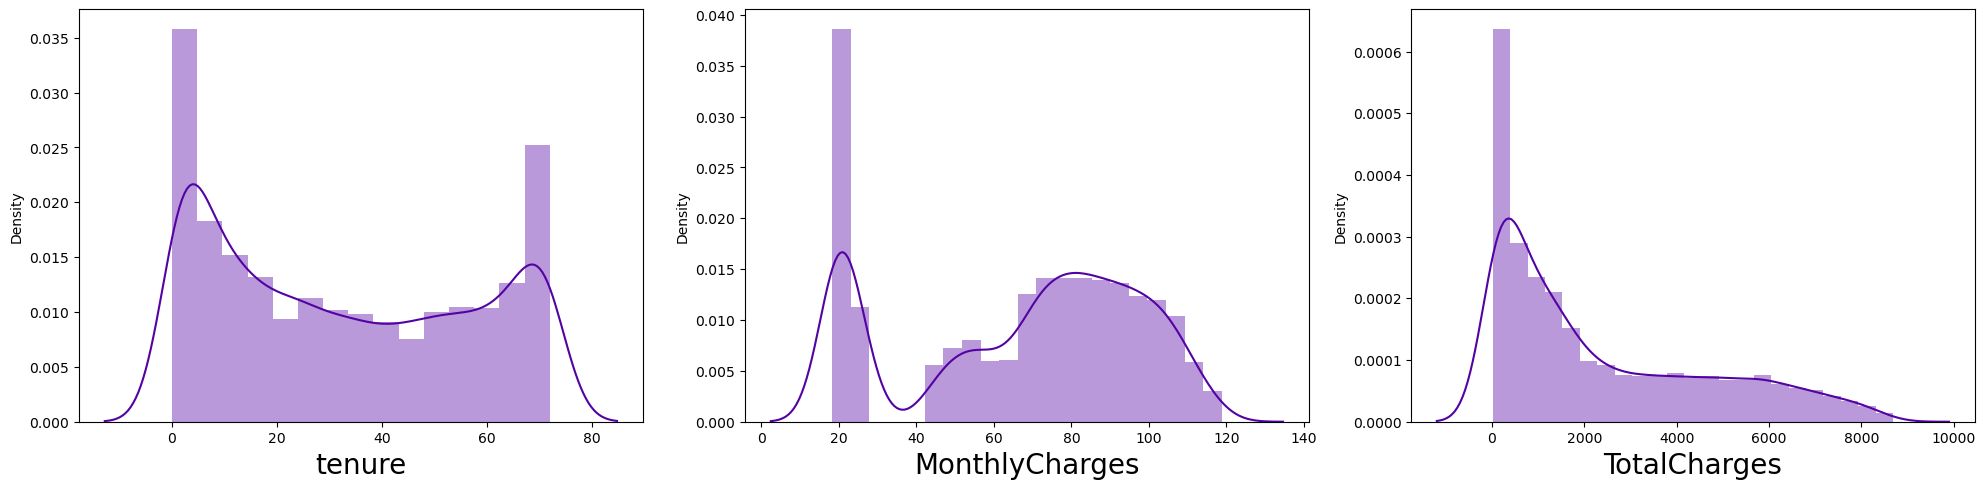

In [58]:
plt.figure(figsize=(20,5),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=3:
        plt.subplot(1,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

**Skewness is important feature for continous data.**

**There is no relevence of skweness for discrete numerical feature like month and categorical feature.So we gone ignore skewness present in discrete numerical and categorical feature.**

In [59]:
df.skew()

gender             -0.012939
SeniorCitizen       1.819335
Partner             0.049562
Dependents          0.871194
tenure              0.233517
MultipleLines       0.125532
InternetService     0.051965
OnlineSecurity      0.421216
OnlineBackup        0.166121
DeviceProtection    0.181524
TechSupport         0.408970
StreamingTV        -0.005185
StreamingMovies    -0.012505
Contract            0.624212
PaperlessBilling   -0.388673
PaymentMethod      -0.165613
MonthlyCharges     -0.404120
TotalCharges        0.895850
Churn               1.058644
dtype: float64

**'tenure','MonthlyCharges', 'TotalCharges' are continous numerical feature in dataset.** 

**Out of which TotalCharges is skewed in nature. Which we gone transform here.**

In [60]:
df['TotalCharges'] = np.log1p(df['TotalCharges'])

## 3. Corrleation 

In [61]:
df.corr()

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.005846 -0.002207    0.015722  0.001891   
SeniorCitizen    -0.005846       1.000000  0.013943   -0.213486  0.017647   
Partner          -0.002207       0.013943  1.000000    0.453409  0.382932   
Dependents        0.015722      -0.213486  0.453409    1.000000  0.159194   
tenure            0.001891       0.017647  0.382932    0.159194  1.000000   
MultipleLines    -0.006391       0.152954  0.147545   -0.028535  0.358098   
InternetService   0.000983      -0.039479 -0.004099    0.053701 -0.034932   
OnlineSecurity   -0.016826      -0.123668  0.151348    0.146427  0.326356   
OnlineBackup     -0.009353      -0.020710  0.154738    0.090389  0.377187   
DeviceProtection -0.003121      -0.023590  0.167390    0.082944  0.367678   
TechSupport      -0.009769      -0.144694  0.132266    0.130166  0.324457   
StreamingTV      -0.005624       0.028453  0.133353    0.048859  0.282710   
StreamingMovies  -0.002760       0.047062  0.127676    0.023932  0.292966   
Contract          0.000674      -0.141107  0.297393    0.242286  0.674586   
PaperlessBilling -0.018131       0.155193 -0.010458   -0.106970  0.002370   
PaymentMethod     0.021961      -0.041891 -0.147854   -0.037411 -0.361878   
MonthlyCharges   -0.011639       0.238426  0.088571   -0.131791  0.242184   
TotalCharges     -0.006783       0.111597  0.337926    0.084275  0.827354   
Churn            -0.011391       0.149599 -0.153262   -0.158628 -0.348882   

                  MultipleLines  InternetService  OnlineSecurity  \
gender                -0.006391         0.000983       -0.016826   
SeniorCitizen          0.152954        -0.039479       -0.123668   
Partner                0.147545        -0.004099        0.151348   
Dependents            -0.028535         0.053701        0.146427   
tenure                 0.358098        -0.034932        0.326356   
MultipleLines          1.000000        -0.107675        0.006752   
InternetService       -0.107675         1.000000       -0.027406   
OnlineSecurity         0.006752        -0.027406        1.000000   
OnlineBackup           0.125043         0.030417        0.198167   
DeviceProtection       0.130055         0.049829        0.173275   
TechSupport            0.011287        -0.022841        0.283252   
StreamingTV            0.187307         0.099513        0.046717   
StreamingMovies        0.193380         0.094169        0.062345   
Contract               0.114261         0.115528        0.367667   
PaperlessBilling       0.174017        -0.164085       -0.154346   
PaymentMethod         -0.183244         0.096674       -0.089597   
MonthlyCharges         0.454819        -0.470605       -0.071808   
TotalCharges           0.458583        -0.260767        0.207795   
Churn                  0.042438        -0.058968       -0.289182   

                  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
gender               -0.009353         -0.003121    -0.009769    -0.005624   
SeniorCitizen        -0.020710         -0.023590    -0.144694     0.028453   
Partner               0.154738          0.167390     0.132266     0.133353   
Dependents            0.090389          0.082944     0.130166     0.048859   
tenure                0.377187          0.367678     0.324457     0.282710   
MultipleLines         0.125043          0.130055     0.011287     0.187307   
InternetService       0.030417          0.049829    -0.022841     0.099513   
OnlineSecurity        0.198167          0.173275     0.283252     0.046717   
OnlineBackup          1.000000          0.195604     0.210090     0.151646   
DeviceProtection      0.195604          1.000000     0.241956     0.278088   
TechSupport           0.210090          0.241956     1.000000     0.174169   
StreamingTV           0.151646          0.278088     0.174169     1.000000   
StreamingMovies       0.139587          0.284397     0.179502     0.429865   
Contract              0.28

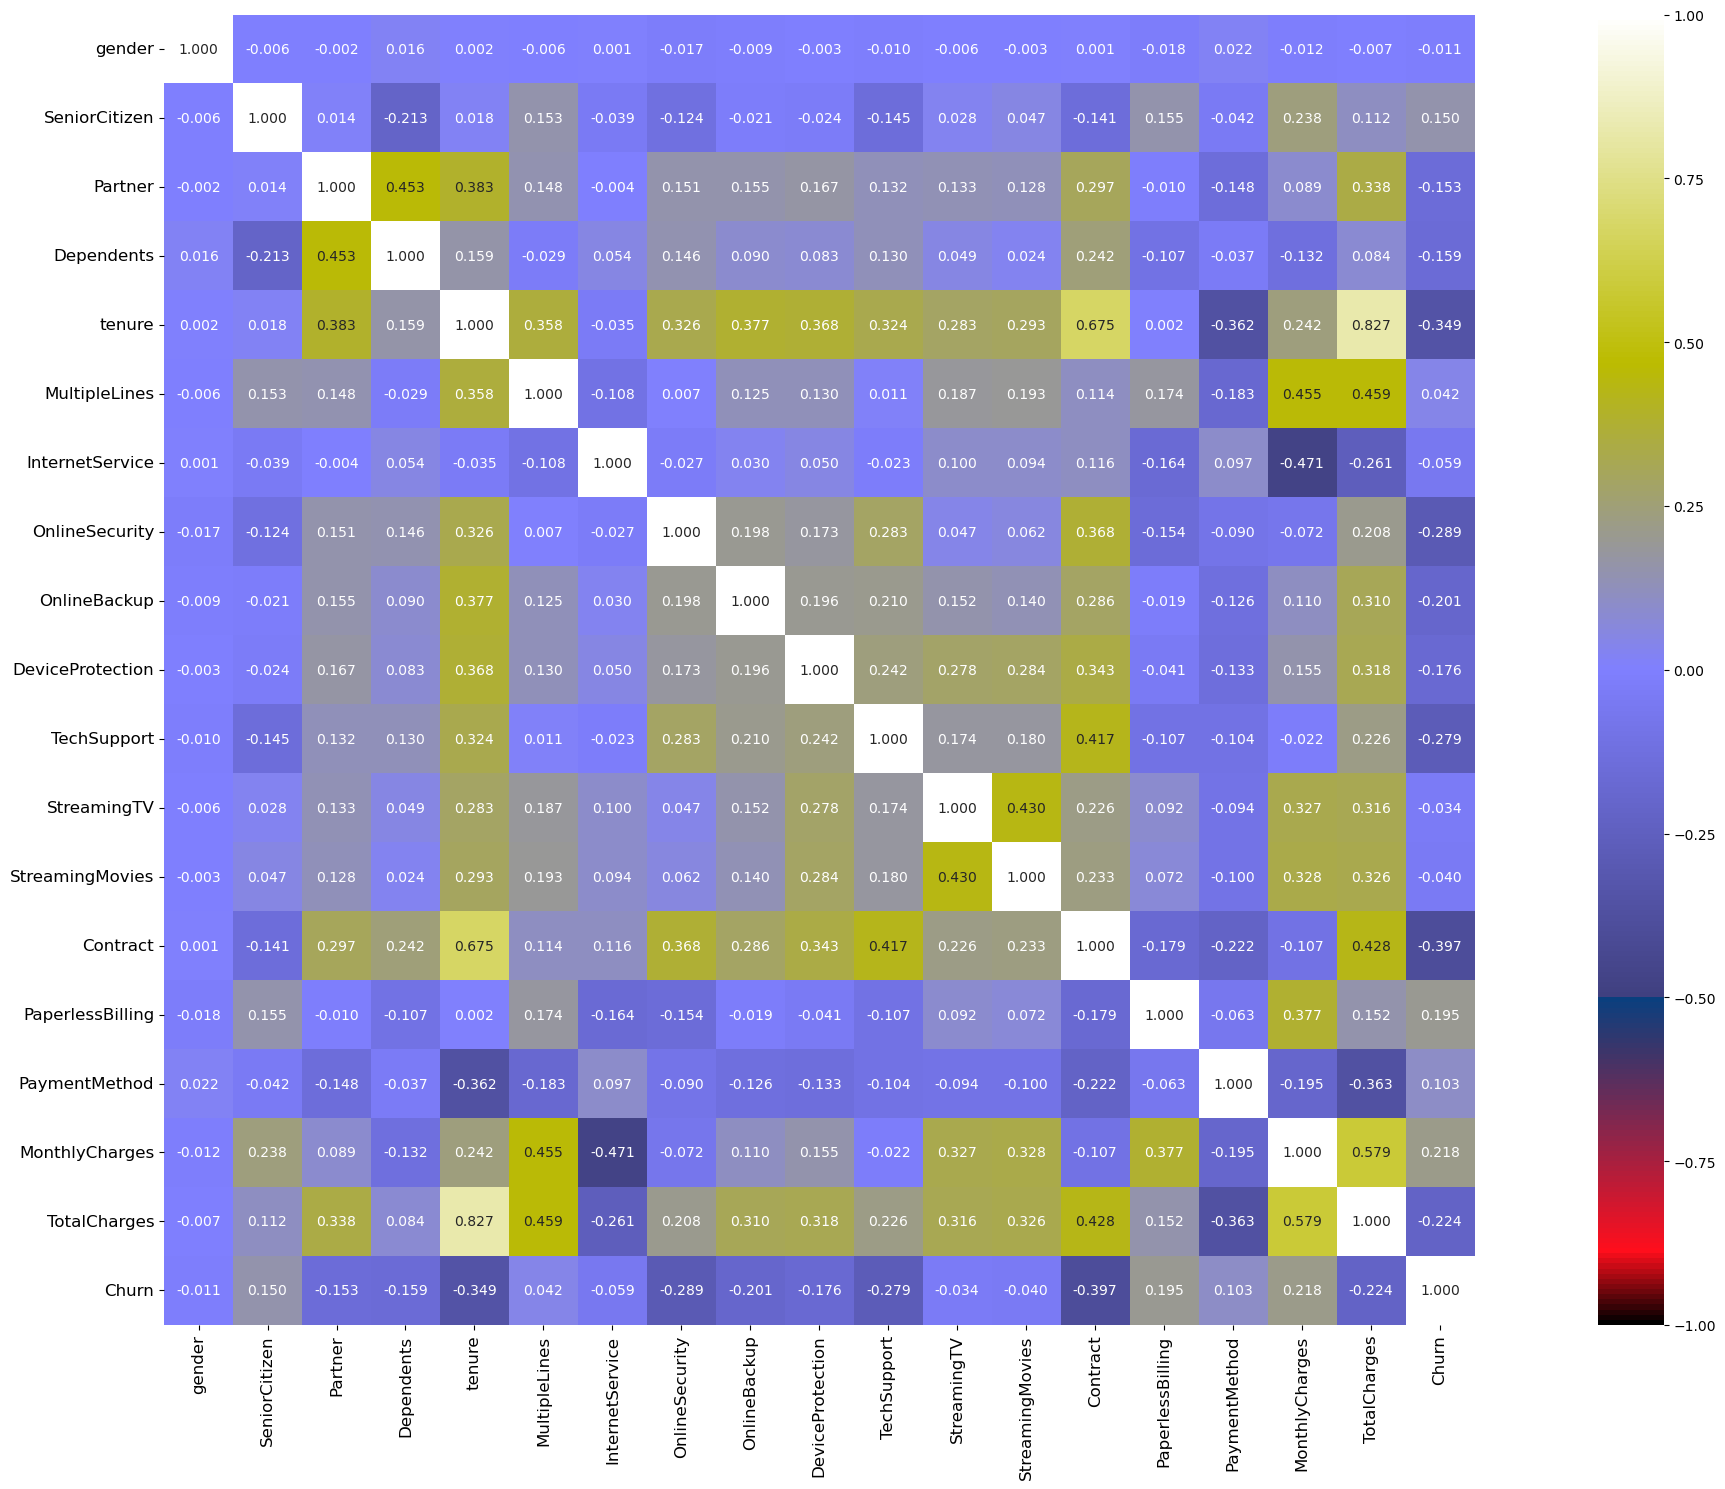

In [62]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

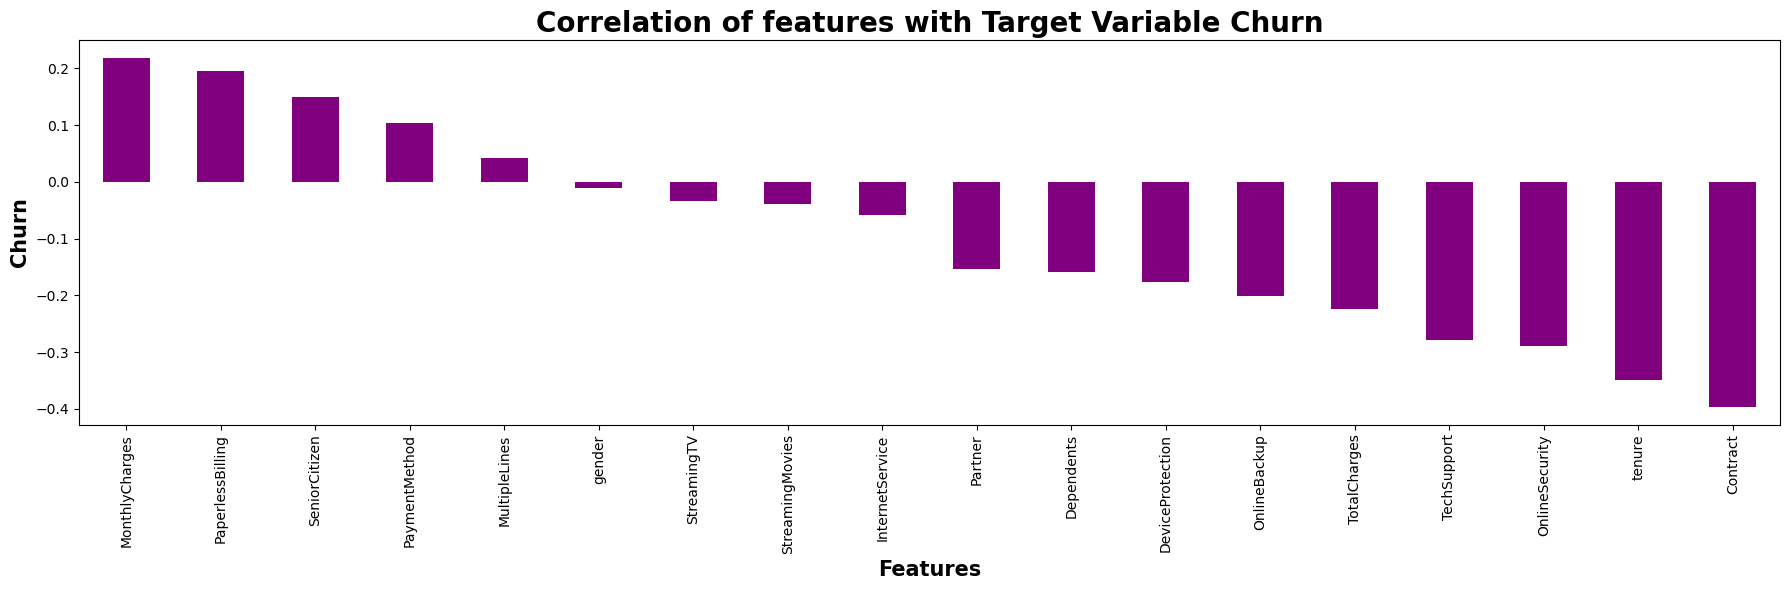

In [63]:
plt.figure(figsize = (18,6))
df.corr()['Churn'].drop(['Churn']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15,fontweight='bold')
plt.ylabel('Churn',fontsize=15,fontweight='bold')
plt.title('Correlation of features with Target Variable Churn',fontsize = 20,fontweight='bold')
plt.show()